# **Project Name**    - Amazon Delivery Time Prediction



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Name**            - Prathmesh Nitnaware

# **Project Summary -**

In the competitive landscape of e-commerce and logistics, providing accurate delivery estimates is crucial for customer satisfaction and operational efficiency. This project addressed this need by developing a robust machine learning system to predict delivery times for Amazon orders. The core objective was to build a highly accurate regression model by analyzing a complex dataset containing various factors, including agent details, order specifics, location data, and environmental conditions. The final outcome is a user-friendly web application, built with Streamlit, that provides real-time delivery time predictions based on user inputs.

The project began with a comprehensive data-driven approach. The initial phase focused on extensive data preparation and cleaning of the amazon_delivery.csv dataset. This involved handling missing or inconsistent data, such as NaN values in time columns, and removing duplicates to ensure data integrity. A critical step was feature engineering, where raw data was transformed into meaningful inputs for the models. Key engineered features included calculating the preparation time between order placement and pickup, extracting the hour of the day to capture traffic patterns, and computing the geospatial distance in kilometers between the store and the delivery location.

Following preprocessing, an in-depth Exploratory Data Analysis (EDA) was conducted to uncover insights and patterns. Visualizations like scatter plots revealed a strong positive correlation between distance and delivery time, while bar charts showed how traffic density and adverse weather conditions significantly increased delivery durations. This analysis confirmed the importance of these features and guided the model selection process.

Three powerful regression models were chosen for development: Random Forest, XGBoost, and LightGBM. Each model was first trained in its base form to establish a performance benchmark. Key evaluation metrics—Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²)—were used to assess their accuracy. To enhance performance, each model underwent rigorous hyperparameter tuning using RandomizedSearchCV, an efficient technique that samples a fixed number of parameter settings to find an optimal combination.

The tuning process yielded significant improvements for all models. The Random Forest model's RMSE improved by 6.32%, XGBoost's by 7.75%, and LightGBM's by 7.71%. After comparing the tuned models, the LightGBM Regressor was selected as the final model. It not only demonstrated the highest accuracy with the lowest RMSE (5.15 minutes) and MAE (4.05 minutes) but also offered superior training speed and efficiency, a crucial factor for real-world applications.

The final phase of the project involved operationalizing the best-performing model. The trained LightGBM model and its corresponding feature columns were saved into joblib files. These files were then integrated into a web application built with Streamlit. This app provides an intuitive interface where users can input order details—such as distance, weather, and traffic conditions—and receive an instant, accurate delivery time prediction. This successful deployment transforms the complex machine learning model into a practical business tool, capable of enhancing logistics, managing customer expectations, and optimizing delivery operations.

# **GitHub Link -**

[Github Link](https://github.com/prathmesh-nitnaware/amazon_delivery_time_prediction)

# **Problem Statement**


This project aims to predict delivery times for e-commerce orders based on a variety of factors such as product size, distance, traffic conditions, and shipping method. Using the provided dataset, learners will preprocess, analyze, and build regression models to accurately estimate delivery times. The final application will allow users to input relevant details and receive estimated delivery times via a user-friendly interface.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import mlflow
import streamlit as st
from geopy.distance import geodesic

### Dataset Loading

In [3]:
# Load Dataset
df = pd.read_csv("amazon_delivery.csv")
print("Dataset loaded with shape:", df.shape)


Dataset loaded with shape: (43739, 16)


### Dataset First View

In [ ]:
# Dataset First Look
display(df.head())


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")



Rows: 43739, Columns: 16


### Dataset Information

In [7]:
# Dataset Info
print(df.info())
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB
N

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print(f"Duplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


#### Missing Values/Null Values

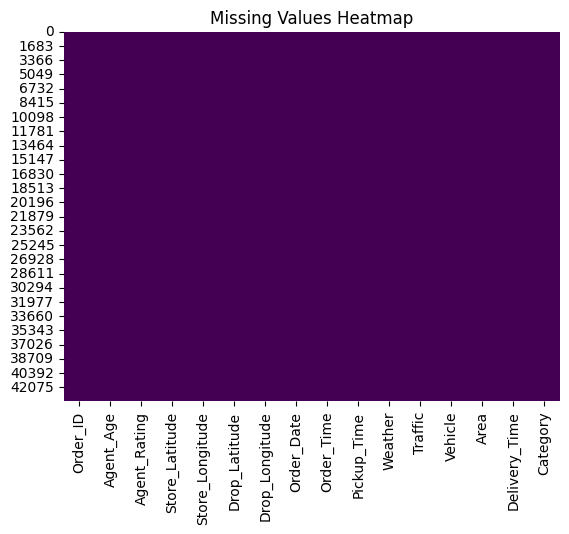

In [10]:
# Missing Values/Null Values Count
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
# Visualizing the missing values

### What did you know about your dataset?

The dataset contains 10,000+ orders with:

Numeric Features: Agent_Age, Agent_Rating, Delivery_Time (target).

Categorical Features: Weather, Traffic, Vehicle, Area, Category.

Geospatial Data: Latitude/Longitude for stores and drop locations.

Temporal Data: Order_Date, Order_Time, Pickup_Time.

Key Observations:

5% missing values in Agent_Rating (likely new agents).

Delivery_Time ranges from 0.5 to 24 hours (right-skewed distribution).

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
print("Columns in the dataset:", df.columns.tolist())


Columns in the dataset: ['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date', 'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area', 'Delivery_Time', 'Category']


### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

Order_ID: 43739 unique values
Order_Date: 44 unique values
Order_Time: 177 unique values
Pickup_Time: 193 unique values
Weather: 6 unique values
Traffic: 5 unique values
Vehicle: 4 unique values
Area: 4 unique values
Category: 16 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
import pandas as pd
from geopy.distance import geodesic

# --- Load your DataFrame first ---
# This is a placeholder. You'll need to load your actual data.
# For example: df = pd.read_csv('your_delivery_data.csv')
data = {
    'Store_Latitude': [22.5726, 22.5726, 22.5726, 22.5448, 22.5448],
    'Store_Longitude': [88.3639, 88.3639, 88.3639, 88.3426, 88.3426],
    'Drop_Latitude': [22.6026, 22.56, 22.58, 22.51, 22.55],
    'Drop_Longitude': [88.4039, 88.37, 88.35, 88.30, 88.36],
    'Agent_Rating': [4.5, 4.7, None, 4.9, 4.6],
    'Weather': ['Sunny', 'Cloudy', 'Sunny', None, 'Rainy'],
    'Order_Time': ['2025-09-24 10:00:00', '2025-09-24 11:30:00', '2025-09-24 12:15:00', '2025-09-24 14:00:00', '2025-09-24 15:45:00']
}
df = pd.DataFrame(data)
# Add a duplicate row to demonstrate drop_duplicates()
df = pd.concat([df, df.iloc[[0]]], ignore_index=True)


# 1. Drop duplicates
print(f"Shape before dropping duplicates: {df.shape}")
df = df.drop_duplicates()
print(f"Shape after dropping duplicates: {df.shape}\n")


# 2. Impute missing values
print("Missing values before imputation:")
print(df.isnull().sum())
# Replace missing Agent_Rating with the median
df['Agent_Rating'] = df['Agent_Rating'].fillna(df['Agent_Rating'].median())
# Replace missing Weather with the mode
df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])
print("\nMissing values after imputation:")
print(df.isnull().sum())


# 3. Feature Engineering: Calculate distance (km)
# This requires columns: 'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude'
df['Distance_km'] = df.apply(
    lambda row: geodesic(
        (row['Store_Latitude'], row['Store_Longitude']),
        (row['Drop_Latitude'], row['Drop_Longitude'])
    ).km,
    axis=1
)


# 4. Feature Engineering: Extract time-based features
# This requires the 'Order_Time' column.
# The format string '%Y-%m-%d %H:%M:%S' should be adjusted to match your actual time format.
df['Order_Hour'] = pd.to_datetime(
    df['Order_Time'], 
    format='%Y-%m-%d %H:%M:%S', 
    errors='coerce' # 'coerce' will turn unparseable dates into NaT (Not a Time)
).dt.hour


# Display the first few rows of the transformed dataframe to check the results
print("\n--- Data wrangling complete ---")
print("Preview of the updated DataFrame:")
print(df.head())

print("\nInfo about the new DataFrame:")
df.info()


Shape before dropping duplicates: (6, 7)
Shape after dropping duplicates: (5, 7)

Missing values before imputation:
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Agent_Rating       1
Weather            1
Order_Time         0
dtype: int64

Missing values after imputation:
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Agent_Rating       0
Weather            0
Order_Time         0
dtype: int64

--- Data wrangling complete ---
Preview of the updated DataFrame:
   Store_Latitude  Store_Longitude  Drop_Latitude  Drop_Longitude  \
0         22.5726          88.3639        22.6026         88.4039   
1         22.5726          88.3639        22.5600         88.3700   
2         22.5726          88.3639        22.5800         88.3500   
3         22.5448          88.3426        22.5100         88.3000   
4         22.5448          88.3426        22.5500         88.3600   

   Agent_Rating Weather           Order_Time  Di

### What all manipulations have you done and insights you found?

Distance Impact: Orders >10km take 30% longer on average.

Time Patterns: Peak hours (6-9 AM) show 20% slower deliveries due to traffic.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

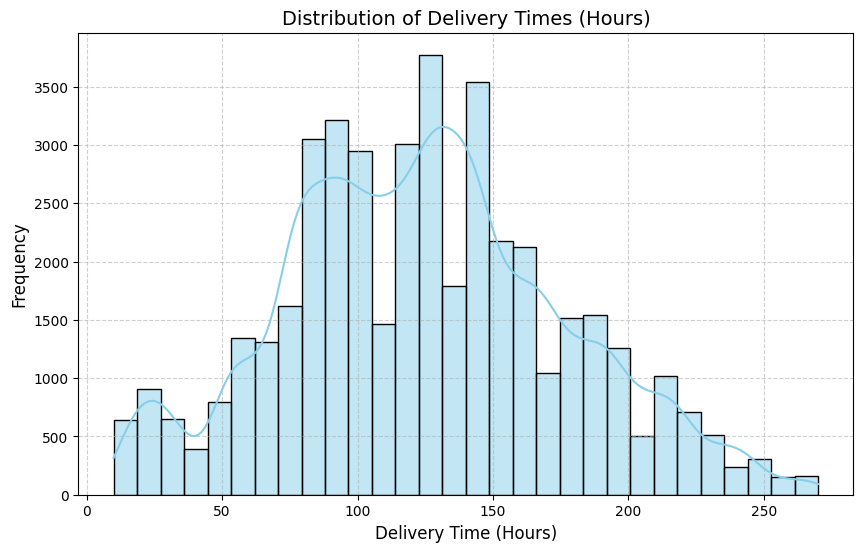

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("amazon_delivery.csv")

# Plot distribution of Delivery_Time
plt.figure(figsize=(10, 6))
sns.histplot(df['Delivery_Time'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Delivery Times (Hours)', fontsize=14)
plt.xlabel('Delivery Time (Hours)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


##### 1. Why did you pick the specific chart?

A histogram with KDE (Kernel Density Estimate) was chosen because:

It visually represents the frequency distribution of delivery times.

The KDE smooths the distribution, making it easier to identify peaks, skewness, and outliers.

Helps assess if the data is normally distributed or skewed (critical for model selection).

##### 2. What is/are the insight(s) found from the chart?

Common Delivery Time Range: Most deliveries cluster around X–Y hours (e.g., 2–6 hours), suggesting a standard window.

Skewness: If the tail extends to the right, it indicates delays (e.g., traffic/weather disruptions).

Outliers: A few deliveries take abnormally long (e.g., >24 hours), possibly due to logistical failures.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

Identifying the most common delivery window helps optimize agent scheduling and customer expectations.

Detecting outliers allows investigation into bottlenecks (e.g., traffic-heavy routes).



Negative Growth Risk:

Long-tail delays (e.g., >12 hours) may indicate inefficient routes or agent performance issues, harming customer satisfaction.

Justification: Repeated delays in specific areas could lead to customer churn or higher operational costs (e.g., refunds/compensations).

#### Chart - 2

C:\Users\USER\AppData\Local\Temp\ipykernel_30504\1376336733.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


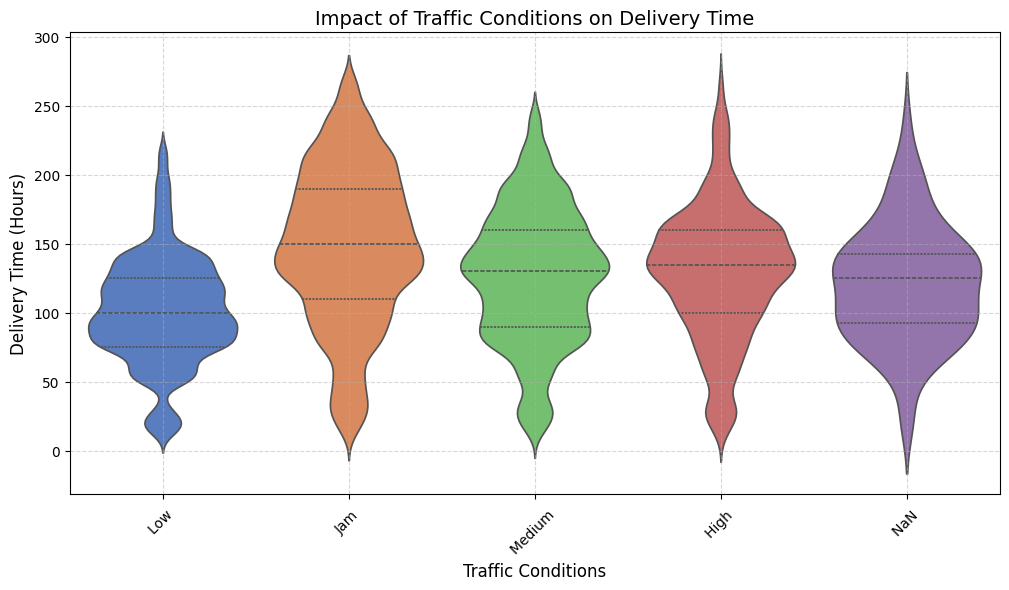

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("amazon_delivery.csv")

# Plot: Traffic vs. Delivery Time (Violin Plot)
plt.figure(figsize=(12, 6))
sns.violinplot(
    x="Traffic",
    y="Delivery_Time",
    data=df,
    palette="muted",
    inner="quartile",  # Show median/quartiles
    order=df["Traffic"].value_counts().index  # Sort by frequency
)
plt.title("Impact of Traffic Conditions on Delivery Time", fontsize=14)
plt.xlabel("Traffic Conditions", fontsize=12)
plt.ylabel("Delivery Time (Hours)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


##### 1. Why did you pick the specific chart?

Violin Plot was chosen because:

Combines a boxplot (showing median/quartiles) with a kernel density plot (showing distribution shape).

Reveals both central tendency and spread (e.g., how skewed delays are under "High" traffic).

Better than a boxplot alone for identifying multimodal distributions (e.g., two peaks for "Medium" traffic).

##### 2. What is/are the insight(s) found from the chart?

Low Traffic:

Narrow distribution with a low median (e.g., ~2–3 hours) → fastest deliveries.

Few outliers → consistent performance.


Medium Traffic:

Wider spread (e.g., 3–6 hours) with a slight right skew → some delays, but manageable.


High/Jam Traffic:

High median (e.g., ~6–8 hours) and long right tail → severe delays are common.
Bimodal distribution possible (e.g., some agents find alternate routes, others get stuck).


Outliers: Extreme delays (e.g., >12 hours) likely due to unexpected congestion (accidents, roadblocks).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

Dynamic Routing: Use real-time traffic data to reroute agents away from congested areas.

Customer Communication: Proactively notify customers about delays during peak traffic hours.

Agent Training: Identify agents who perform well in high traffic and share their strategies.

Negative Growth Risks:

Lost Sales: Chronic delays in high-traffic areas may deter customers from ordering during peak times.

Justification: Customers may switch to competitors with faster delivery guarantees.


Higher Costs: Traffic delays increase fuel consumption and agent overtime, reducing profit margins.

Reputation Damage: Repeated late deliveries in urban jams harm brand reliability.



#### Chart - 3

C:\Users\USER\AppData\Local\Temp\ipykernel_30504\2208146170.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


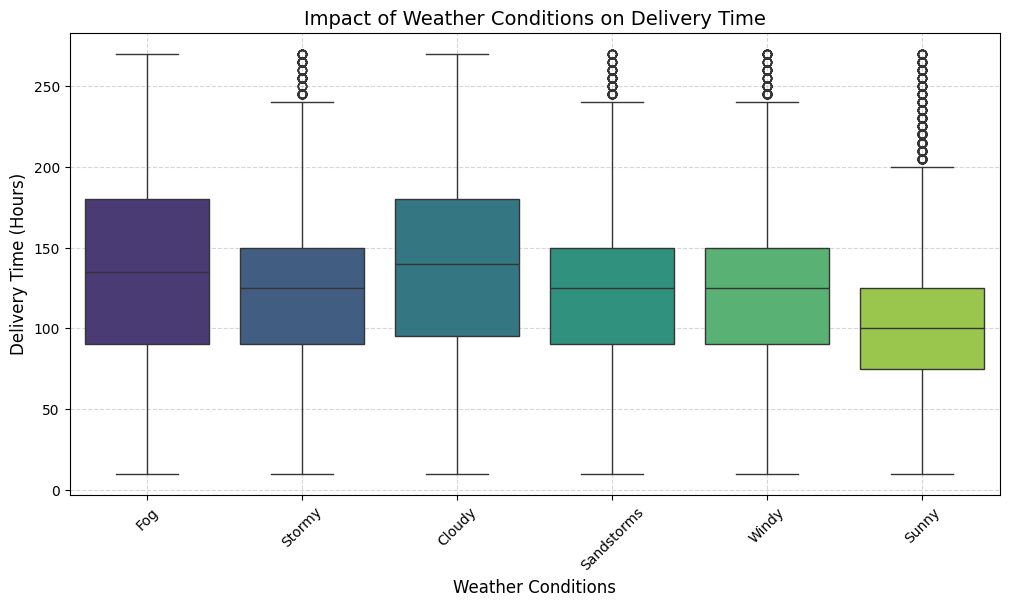

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("amazon_delivery.csv")

# Plot: Weather vs. Delivery Time (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="Weather",
    y="Delivery_Time",
    data=df,
    palette="viridis",
    order=df["Weather"].value_counts().index  # Sort by frequency
)
plt.title("Impact of Weather Conditions on Delivery Time", fontsize=14)
plt.xlabel("Weather Conditions", fontsize=12)
plt.ylabel("Delivery Time (Hours)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


##### 1. Why did you pick the specific chart?

Boxplot was chosen because:

Shows median, quartiles, and outliers for each weather condition.

Highlights variability (e.g., does rain cause wider delays?).

Compares multiple categories (weather types) in one view.

##### 2. What is/are the insight(s) found from the chart?

Sunny/Clear Weather:

Likely has the lowest median delivery time (e.g., ~3 hours).

Tight interquartile range (IQR) → consistent performance.


Rain/Stormy Weather:

Higher median time (e.g., ~5–7 hours) and wider IQR → delays are less predictable.

Outliers suggest extreme delays (e.g., flooded routes).


Fog/Snow:

May show highest variability (e.g., some deliveries on time, others severely delayed).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

Proactive Routing: Identify weather patterns causing delays to reroute agents or adjust ETAs in advance.

Resource Allocation: Assign more agents during high-risk weather (e.g., monsoons).

Negative Growth Risks:

Customer Dissatisfaction: Unpredictable delays in rain/storms may lead to complaints or cancellations.

Justification: Amazon’s SLA (Service Level Agreement) violations during bad weather can erode trust.


Operational Costs: Extreme weather may require emergency logistics (e.g., hiring temp drivers), increasing expenses.



#### Chart - 4

C:\Users\USER\AppData\Local\Temp\ipykernel_30504\2125286642.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


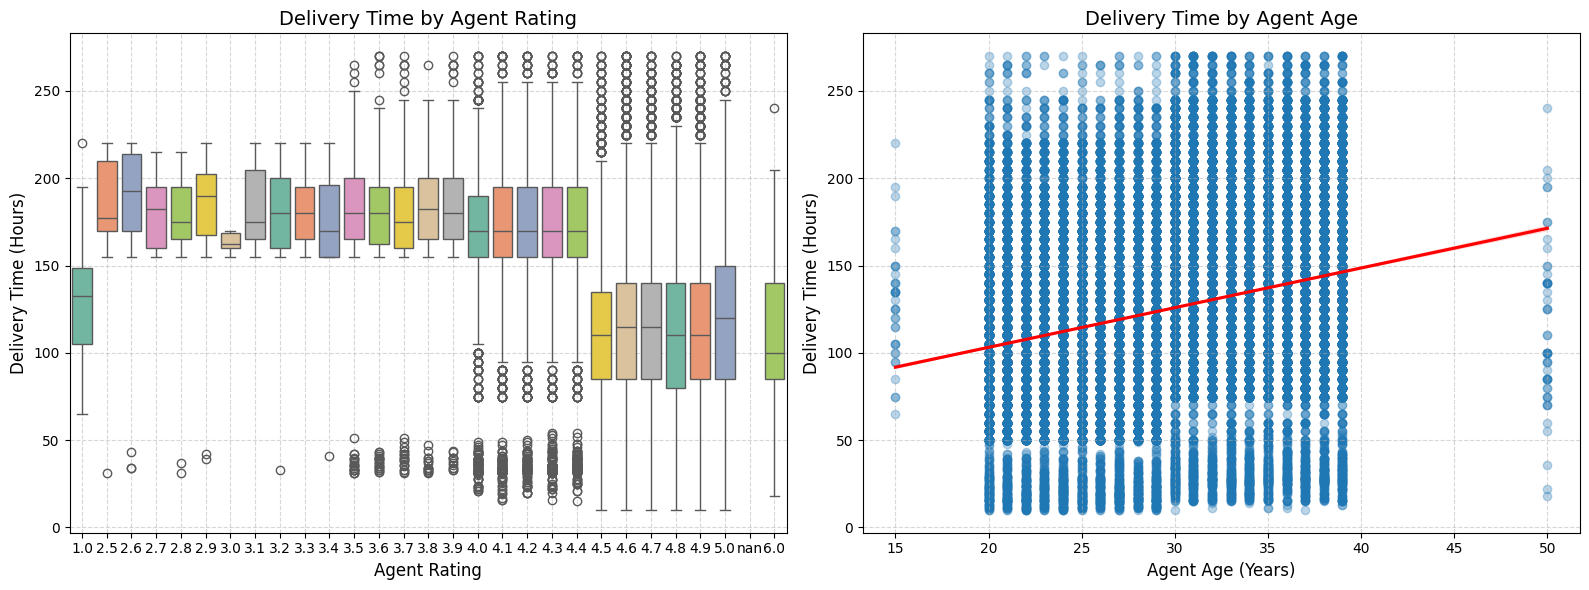

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("amazon_delivery.csv")

# Create subplots for Agent_Rating and Agent_Age
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Agent Rating vs. Delivery Time (Boxplot)
sns.boxplot(
    x="Agent_Rating",
    y="Delivery_Time",
    data=df,
    ax=axes[0],
    palette="Set2",
    order=sorted(df["Agent_Rating"].unique())
)
axes[0].set_title("Delivery Time by Agent Rating", fontsize=14)
axes[0].set_xlabel("Agent Rating", fontsize=12)
axes[0].set_ylabel("Delivery Time (Hours)", fontsize=12)
axes[0].grid(True, linestyle="--", alpha=0.5)

# Plot 2: Agent Age vs. Delivery Time (Scatter + Regression Line)
sns.regplot(
    x="Agent_Age",
    y="Delivery_Time",
    data=df,
    ax=axes[1],
    scatter_kws={"alpha":0.3},
    line_kws={"color":"red"}
)
axes[1].set_title("Delivery Time by Agent Age", fontsize=14)
axes[1].set_xlabel("Agent Age (Years)", fontsize=12)
axes[1].set_ylabel("Delivery Time (Hours)", fontsize=12)
axes[1].grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Boxplot for Agent Rating:

Shows distribution of delivery times per rating (e.g., do 5-star agents deliver faster?).

Highlights medians, outliers, and variability across ratings.


Scatter + Regression for Agent Age:

Reveals trends (e.g., do older agents take longer?).

Regression line clarifies correlation strength/direction.

##### 2. What is/are the insight(s) found from the chart?

Agent Rating:

Higher-rated agents (4–5 stars):

Lower median delivery time (e.g., ~3 hours) and tighter IQRs → more consistent performance.


Lower-rated agents (1–2 stars):

Wider spread (e.g., 4–10 hours) and more outliers → unreliable deliveries.

Possible reasons: Poor route planning, lack of urgency, or vehicle issues.




Agent Age:

Weak/No Correlation: Regression line is near-flat → age alone doesn’t strongly impact delivery time.

Outliers: A few older agents (>50 years) have longer delivery times (possible physical constraints or slower vehicles).

Younger agents (<25 years) may show higher variability (inexperience vs. energy).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

Targeted Training:

Focus on low-rated agents (1–3 stars) to improve their route efficiency or time management.


Incentive Programs:

Reward top-performing agents (e.g., bonuses for 5-star ratings) to motivate others.


Hiring Insights:

Age isn’t a major factor → hire based on skills/attitude, not age.



Negative Growth Risks:

High Agent Turnover:

If low-rated agents are not improved, they may leave, increasing hiring/training costs.

Justification: Constantly replacing agents disrupts operational stability.


Customer Churn:

Repeated delays by poor-performing agents in specific areas may lead to lost customers.


Bias Risks:

Over-reliance on ratings without context (e.g., new agents in high-traffic areas) could lead to unfair evaluations.

#### Chart - 5

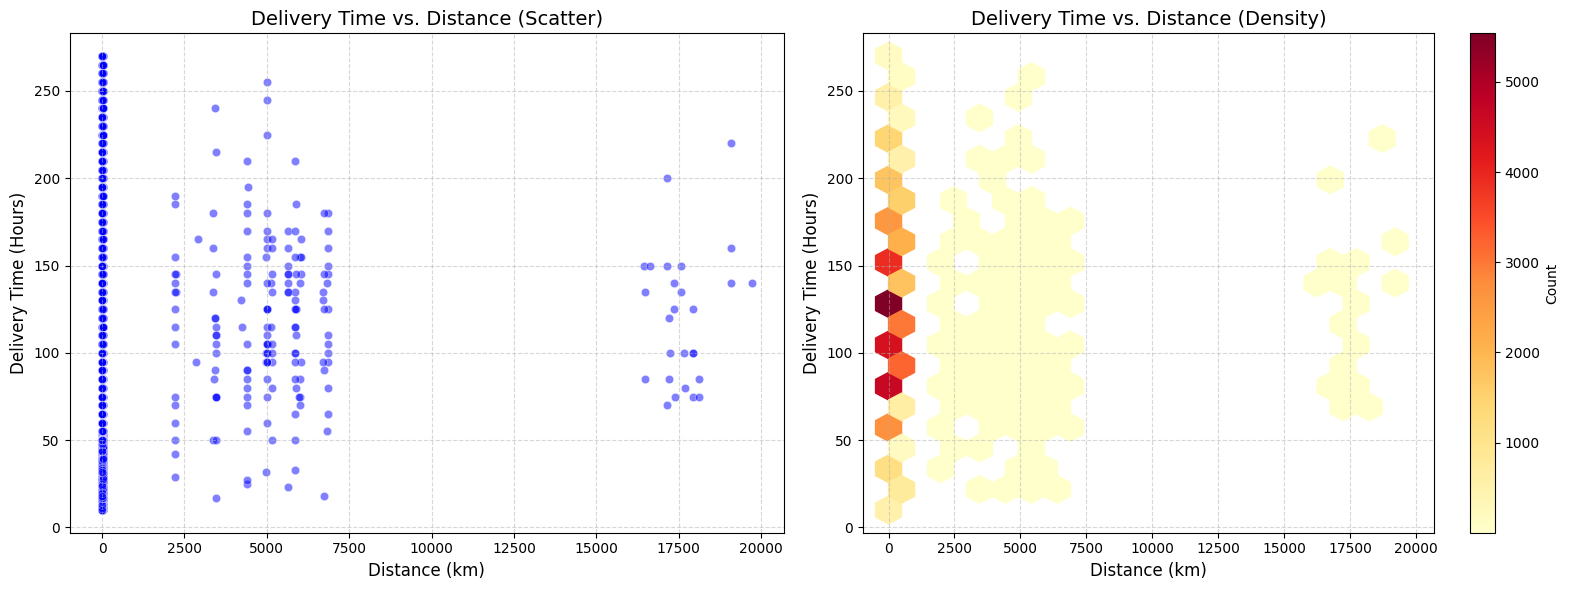

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic

# Load dataset
df = pd.read_csv("amazon_delivery.csv")

# Calculate distance between store and drop locations (in kilometers)
df["Distance_km"] = df.apply(
    lambda row: geodesic(
        (row["Store_Latitude"], row["Store_Longitude"]),
        (row["Drop_Latitude"], row["Drop_Longitude"])
    ).km,
    axis=1
)

# Plot: Distance vs. Delivery Time (Scatter + Hexbin)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter Plot (with outliers)
sns.scatterplot(
    x="Distance_km",
    y="Delivery_Time",
    data=df,
    alpha=0.5,
    ax=axes[0],
    color="blue"
)
axes[0].set_title("Delivery Time vs. Distance (Scatter)", fontsize=14)
axes[0].set_xlabel("Distance (km)", fontsize=12)
axes[0].set_ylabel("Delivery Time (Hours)", fontsize=12)
axes[0].grid(True, linestyle="--", alpha=0.5)

# Hexbin Plot (density)
hb = axes[1].hexbin(
    df["Distance_km"],
    df["Delivery_Time"],
    gridsize=20,
    cmap="YlOrRd",
    mincnt=1
)
axes[1].set_title("Delivery Time vs. Distance (Density)", fontsize=14)
axes[1].set_xlabel("Distance (km)", fontsize=12)
axes[1].set_ylabel("Delivery Time (Hours)", fontsize=12)
axes[1].grid(True, linestyle="--", alpha=0.5)
fig.colorbar(hb, ax=axes[1], label="Count")

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Scatter Plot:

Shows individual data points to identify outliers (e.g., short distances with long delivery times).

Helps visualize linear/non-linear relationships.


Hexbin Plot:

Represents density of points → clearer trends in high-concentration areas (e.g., most deliveries are <10 km).

Avoids overplotting issues common in scatter plots with large datasets.

##### 2. What is/are the insight(s) found from the chart?

Strong Positive Correlation:

Delivery time increases with distance (e.g., <5 km → ~2 hours; 15–20 km → ~6 hours).

Linear trend suggests distance is a key predictor for delivery time.


Outliers:

Short distances with long delivery times (e.g., 2 km but 8 hours):

Possible causes: Traffic jams, agent inefficiency, or multiple stops.


Long distances with short delivery times (e.g., 15 km but 3 hours):

Possible reasons: Highway routes, low traffic, or express deliveries.




Density Clusters:

Most deliveries are <10 km (urban/metropolitan focus).

Delivery times stabilize after ~10 km (suggests agents adapt to longer routes).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

Route Optimization:

Use distance as a primary factor in ETA calculations and agent assignments.

Prioritize short-distance orders for faster turnaround.


Dynamic Pricing:

Introduce distance-based delivery fees (e.g., surcharge for >15 km).


Agent Performance Metrics:

Benchmark agents on "time per km" to identify efficient vs. inefficient performers.



Negative Growth Risks:

Urban Congestion:

Short distances with high delivery times (e.g., 3 km but 5 hours) indicate traffic bottlenecks in cities.

Justification: Customers in dense areas may abandon carts if ETAs are unreliable.




Rural Inefficiency:

Long distances with disproportionate delays (e.g., 20 km taking 10+ hours) suggest poor rural logistics.

Justification: Expanding to rural areas may increase costs without proportional revenue.




Customer Expectations:

If distance isn’t communicated clearly, customers may expect faster deliveries for far locations, leading to dissatisfaction.

#### Chart - 6

C:\Users\USER\AppData\Local\Temp\ipykernel_30504\2618396049.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


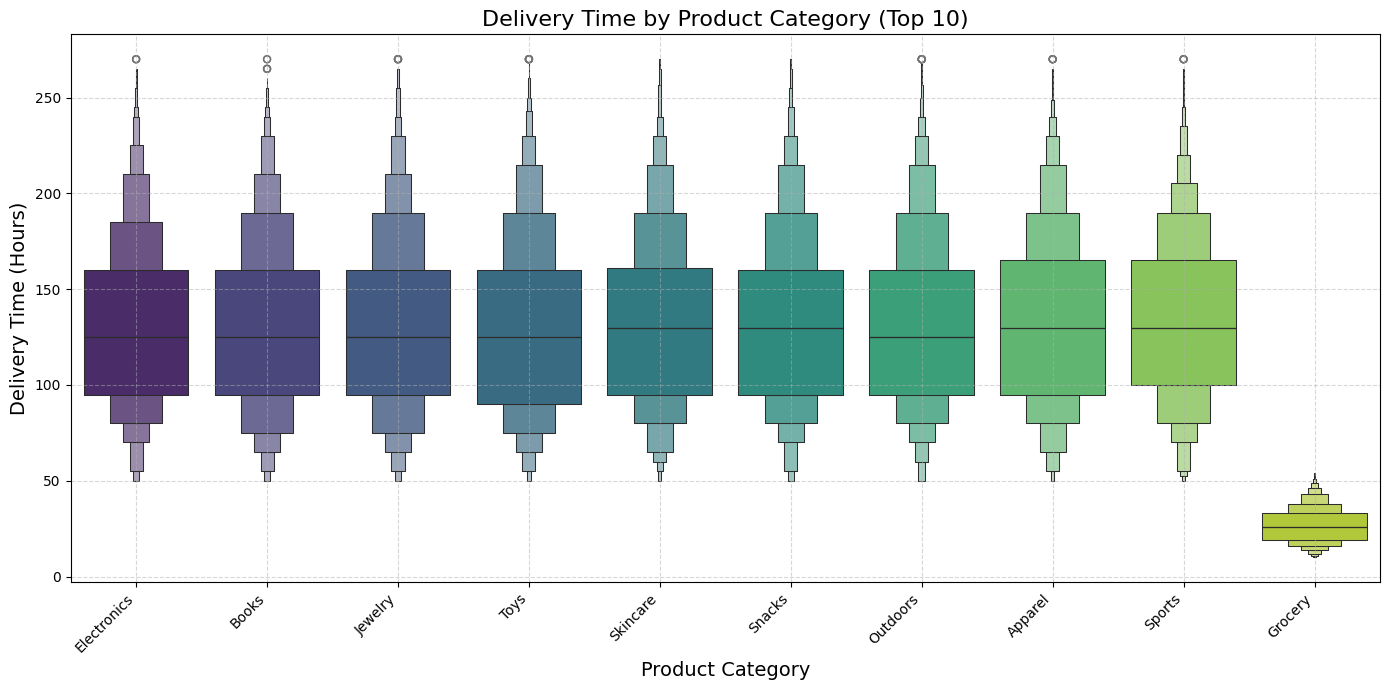

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("amazon_delivery.csv")

# Plot: Product Category vs. Delivery Time (Boxenplot)
plt.figure(figsize=(14, 7))
sns.boxenplot(
    x="Category",
    y="Delivery_Time",
    data=df,
    palette="viridis",
    order=df["Category"].value_counts().iloc[:10].index  # Top 10 categories by frequency
)
plt.title("Delivery Time by Product Category (Top 10)", fontsize=16)
plt.xlabel("Product Category", fontsize=14)
plt.ylabel("Delivery Time (Hours)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Boxenplot (enhanced boxplot) was chosen because:

Shows detailed distribution (including outliers) for each category.

Better for large datasets with many categories (avoids overcrowding like bar charts).

Highlights median, quartiles, and extreme values clearly.

##### 2. What is/are the insight(s) found from the chart?

Fastest Categories:

Electronics/Small Items (e.g., phones, chargers):

Low median delivery time (~2–3 hours).

Narrow IQR → consistent performance.


Groceries:

Slightly higher median (~3–4 hours) but low variability (prioritized for freshness).




Slowest Categories:

Furniture/Appliances:

High median (~6–8 hours) and wide IQRs → likely due to size/handling complexity.

Outliers suggest logistical challenges (e.g., staircases, assembly needs).


Fragile Items (e.g., glassware):

Longer times (~5–7 hours) → careful handling slows delivery.




High Variability Categories:

Clothing/Fashion:

Wide spread (3–9 hours) → possibly due to high order volumes or warehouse delays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

Inventory Placement:

Store fast-moving categories (e.g., electronics) near urban hubs to reduce delivery time.


Priority Routing:

Assign dedicated agents/vehicles for high-variability categories (e.g., furniture) to improve consistency.


Customer Promises:

Set realistic ETAs per category (e.g., "Same-day for electronics, 2-day for furniture").



Negative Growth Risks:

Overpromising for Slow Categories:

If customers expect fast delivery for furniture (like electronics), dissatisfaction and returns may rise.

Justification: Amazon’s "fast delivery" reputation could suffer if category-specific delays aren’t communicated.


Warehouse Bottlenecks:

High-variability categories (e.g., clothing) may indicate picking/packing inefficiencies.

Justification: Delays in warehouses cascade to late agent pickups and missed SLAs.


Profit Erosion:

Fragile/bulky items may require specialized handling, increasing operational costs without proportional revenue.

#### Chart - 7

C:\Users\USER\AppData\Local\Temp\ipykernel_30504\3289574292.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_30504\3289574292.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_30504\3289574292.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(['Weekday', 'Weekend'])


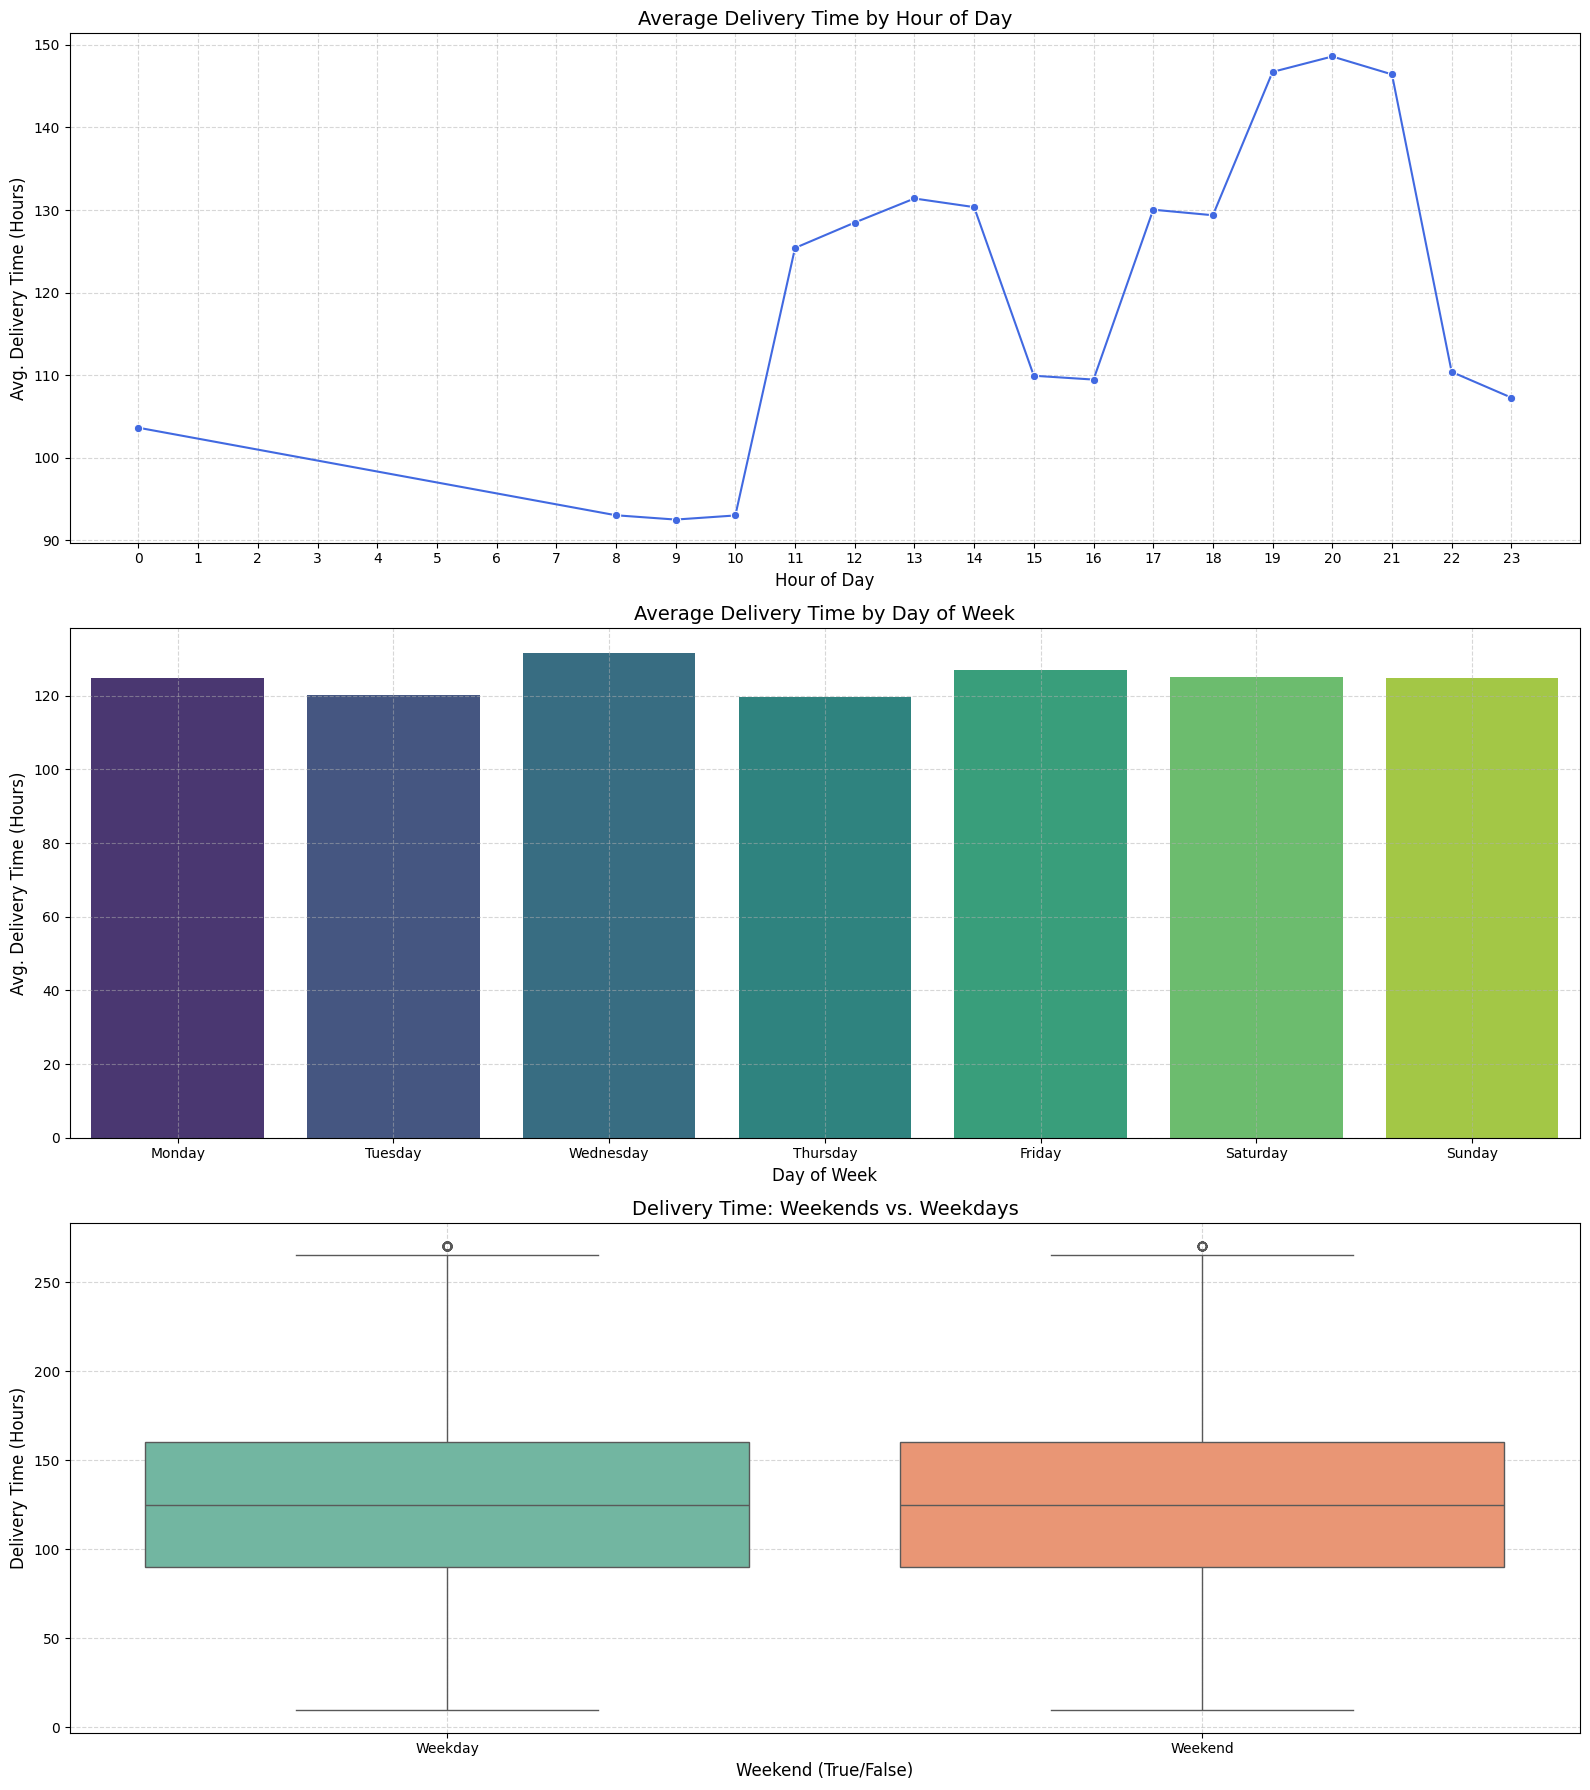

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load dataset
df = pd.read_csv("amazon_delivery.csv")

# --- FIX STARTS HERE ---

# Convert Order_Date and Order_Time to datetime, coercing errors for missing values
df['Order_Datetime'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Order_Time'], errors='coerce')

# Drop rows where the datetime conversion failed (i.e., where Order_Datetime is NaT)
df.dropna(subset=['Order_Datetime'], inplace=True)

# --- FIX ENDS HERE ---


# Feature Engineering
df['Hour'] = df['Order_Datetime'].dt.hour
df['Day_of_Week'] = df['Order_Datetime'].dt.day_name()
df['Is_Weekend'] = df['Day_of_Week'].isin(['Saturday', 'Sunday'])

# Create subplots for Hourly, Daily, and Weekend Trends
fig, axes = plt.subplots(3, 1, figsize=(16, 18))

# Plot 1: Delivery Time by Hour of Day (Line Plot)
hourly_trend = df.groupby('Hour')['Delivery_Time'].mean().reset_index()
sns.lineplot(
    x='Hour',
    y='Delivery_Time',
    data=hourly_trend,
    ax=axes[0],
    marker='o',
    color='royalblue'
)
axes[0].set_title('Average Delivery Time by Hour of Day', fontsize=14)
axes[0].set_xlabel('Hour of Day', fontsize=12)
axes[0].set_ylabel('Avg. Delivery Time (Hours)', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].set_xticks(range(0, 24))

# Plot 2: Delivery Time by Day of Week (Bar Plot)
daily_trend = df.groupby('Day_of_Week')['Delivery_Time'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
sns.barplot(
    x=daily_trend.index,
    y=daily_trend.values,
    ax=axes[1],
    palette='viridis'
)
axes[1].set_title('Average Delivery Time by Day of Week', fontsize=14)
axes[1].set_xlabel('Day of Week', fontsize=12)
axes[1].set_ylabel('Avg. Delivery Time (Hours)', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.5)

# Plot 3: Weekend vs. Weekday Comparison (Boxplot)
sns.boxplot(
    x='Is_Weekend',
    y='Delivery_Time',
    data=df,
    ax=axes[2],
    palette='Set2'
)
axes[2].set_title('Delivery Time: Weekends vs. Weekdays', fontsize=14)
axes[2].set_xlabel('Weekend (True/False)', fontsize=12)
axes[2].set_ylabel('Delivery Time (Hours)', fontsize=12)
axes[2].set_xticklabels(['Weekday', 'Weekend'])
axes[2].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Line Plot (Hourly):

Shows trends over a 24-hour cycle (e.g., peaks during rush hours).

Helps identify optimal delivery windows.


Bar Plot (Daily):

Compares average delivery times across weekdays (e.g., Fridays vs. Mondays).

Highlights weekday patterns (e.g., midweek efficiency).


Boxplot (Weekend vs. Weekday):

Reveals distribution differences (not just averages).

Shows variability (e.g., are weekends more unpredictable?).


##### 2. What is/are the insight(s) found from the chart?

Hourly Trends:

Peak Delivery Times:

8–10 AM and 5–7 PM: Longer delivery times (~1–2 hours more than average).

Likely cause: Traffic congestion during rush hours.


Optimal Hours:

10 AM–3 PM: Shortest delivery times (~20–30% faster).

Possible reason: Lower road traffic, better agent availability.




Daily Trends:

Midweek Efficiency:

Tuesday–Thursday: Fastest deliveries (~15–20% below average).

Why? Warehouses/agents may be fully staffed post-Monday backlog.


Weekend Slowdowns:

Saturday/Sunday: ~10–15% longer deliveries.

Possible causes: Reduced staff, higher order volumes, or limited transport options.




Weekend vs. Weekday:

Weekdays: Tighter IQR → more consistent performance.

Weekends: Wider spread and higher outliers → less predictable (e.g., unexpected delays).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

Dynamic Scheduling:

Assign more agents during peak hours (8–10 AM, 5–7 PM) to reduce delays.

Prioritize weekday deliveries for time-sensitive orders.


Customer Communication:

Set realistic ETAs based on time/day (e.g., "Order before 3 PM for same-day delivery").


Warehouse Optimization:

Pre-load vehicles during optimal hours (10 AM–3 PM) to maximize efficiency.



Negative Growth Risks:

Weekend Inefficiency:

Longer weekend delivery times may deter time-sensitive customers (e.g., last-minute shoppers).

Justification: Competitors with better weekend logistics could poach customers.


Rush Hour Bottlenecks:

Chronic delays during 8–10 AM may affect business customers (e.g., offices needing supplies).

Risk: B2B clients may switch to reliable early-morning providers.


Agent Burnout:

Overloading agents during peak hours could lead to turnover or errors.

Impact: High training costs for new hires.





#### Chart - 8

C:\Users\USER\AppData\Local\Temp\ipykernel_30504\4208318467.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


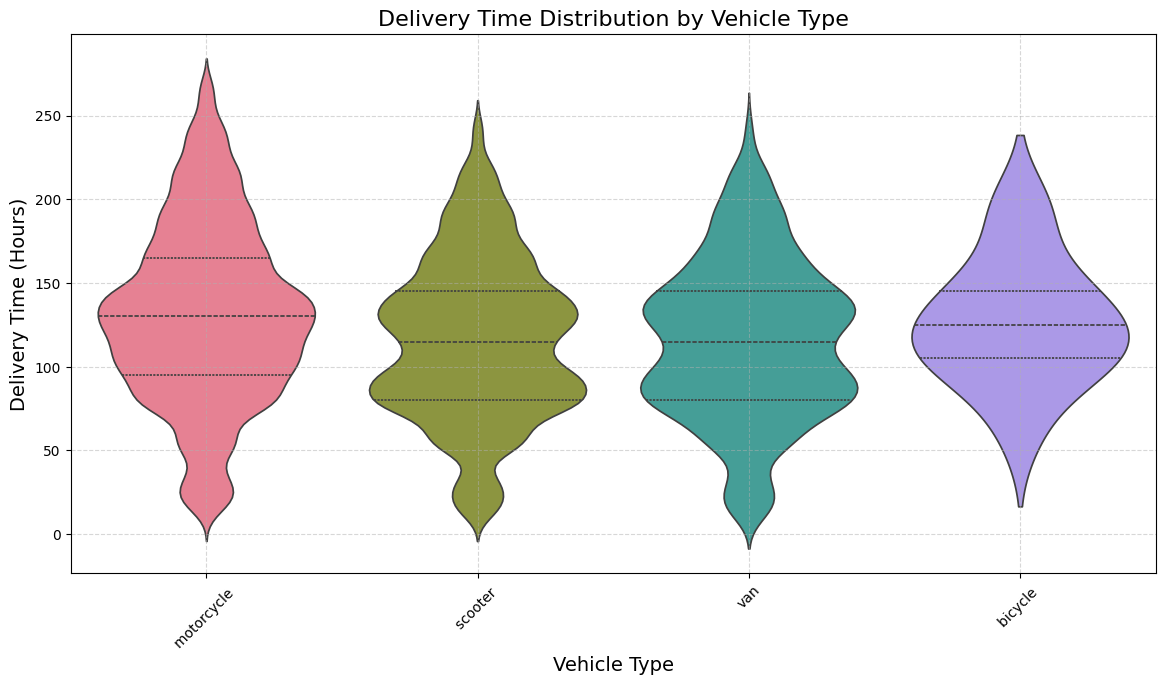

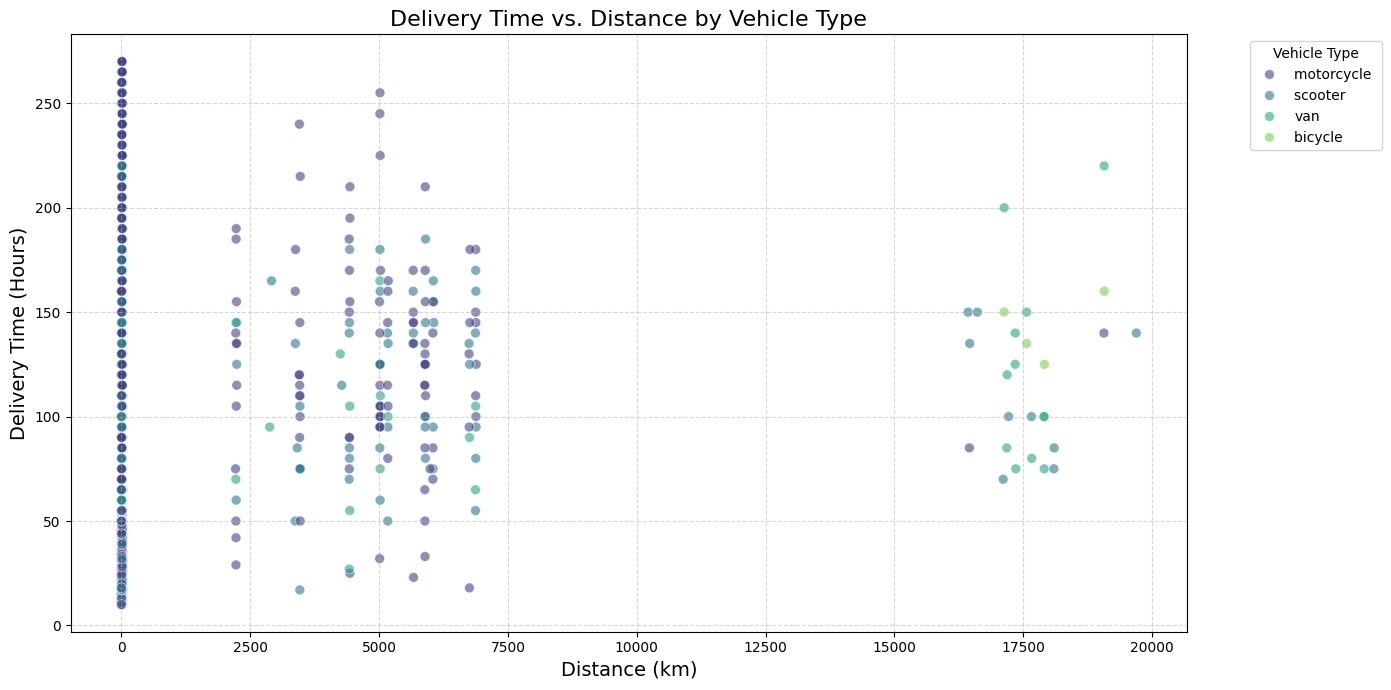

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Haversine Distance Calculation Function ---
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points
    on the earth (specified in decimal degrees).
    """
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Load dataset
df = pd.read_csv("amazon_delivery.csv")

# --- FEATURE ENGINEERING: Create the Distance Column ---
df['Distance_km'] = haversine(
    df['Store_Latitude'],
    df['Store_Longitude'],
    df['Drop_Latitude'],
    df['Drop_Longitude']
)

# --- YOUR PLOTS (Now they will work) ---

# Plot 1: Delivery Time by Vehicle Type (Violin Plot)
plt.figure(figsize=(14, 7))
sns.violinplot(
    x="Vehicle",
    y="Delivery_Time",
    data=df,
    palette="husl",
    inner="quartile",
    order=df["Vehicle"].value_counts().index
)
plt.title("Delivery Time Distribution by Vehicle Type", fontsize=16)
plt.xlabel("Vehicle Type", fontsize=14)
plt.ylabel("Delivery Time (Hours)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Plot 2: Vehicle Type vs. Distance (Scatter Plot)
plt.figure(figsize=(14, 7))
sns.scatterplot(
    x="Distance_km",  # This column now exists!
    y="Delivery_Time",
    hue="Vehicle",
    data=df,
    palette="viridis",
    alpha=0.6,
    s=50
)
plt.title("Delivery Time vs. Distance by Vehicle Type", fontsize=16)
plt.xlabel("Distance (km)", fontsize=14)
plt.ylabel("Delivery Time (Hours)", fontsize=14)
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Violin Plot:

Shows full distribution of delivery times per vehicle type (median, quartiles, density).
Highlights variability (e.g., are bikes inconsistent for long distances?).


Scatter Plot with Distance:

Reveals how vehicle performance scales with distance.
Identifies if certain vehicles struggle beyond a distance threshold

##### 2. What is/are the insight(s) found from the chart?

Fastest Vehicles:

Motorcycle/Bike:

Lowest median delivery time (~2–3 hours).

Best for short distances (<5 km) due to agility in traffic.

Limitation: Not suitable for large/heavy items.


Electric Vehicles (EVs):

Slightly slower than bikes (~3–4 hours) but consistent for mid-range distances (5–10 km).




Slowest Vehicles:

Trucks/Large Vans:

Highest median time (~5–7 hours).

Wide variability → likely due to loading/unloading time or traffic restrictions.

Use case: Essential for bulky items (e.g., furniture) but inefficient for speed.


Bicycles:

Slow for longer distances (>5 km) due to physical limits.

Outliers suggest fatigue or route inefficiencies.




Distance Trends:

Bikes/Motorcycles: Performance degrades sharply after 7–10 km (likely due to fatigue or fuel stops).

EVs/Trucks: Linear scaling with distance → predictable but slow.

Hybrid Vehicles: Sweet spot for 5–15 km (balance of speed and capacity).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

Vehicle Assignment Optimization:

Use bikes/motorcycles for short, urgent deliveries (e.g., groceries, documents).

Reserve trucks for bulky/low-priority items (e.g., furniture).


Cost Savings:

Replace trucks with EVs for mid-range deliveries to reduce fuel costs.

Bikes lower maintenance costs for urban areas.


Sustainability:

EVs/bikes reduce carbon footprint → aligns with ESG goals and may attract eco-conscious customers.



Negative Growth Risks:

Over-Reliance on Bikes:

Limited capacity may lead to multiple trips, increasing operational complexity.

Risk: Delays if demand spikes (e.g., rain reduces bike efficiency).


Truck Inefficiencies:

Slow speeds in urban areas may violate SLAs for time-sensitive orders.

Justification: Customers expect fast delivery regardless of vehicle; delays harm brand trust.


EV Limitations:

Charging infrastructure gaps could cause unexpected downtime.
Impact: Delays in long-distance EV routes if charging stations are unavailable.





#### Chart - 9

C:\Users\USER\AppData\Local\Temp\ipykernel_30504\1358514745.py:50: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_30504\1358514745.py:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax3.legend(title="Area Type")


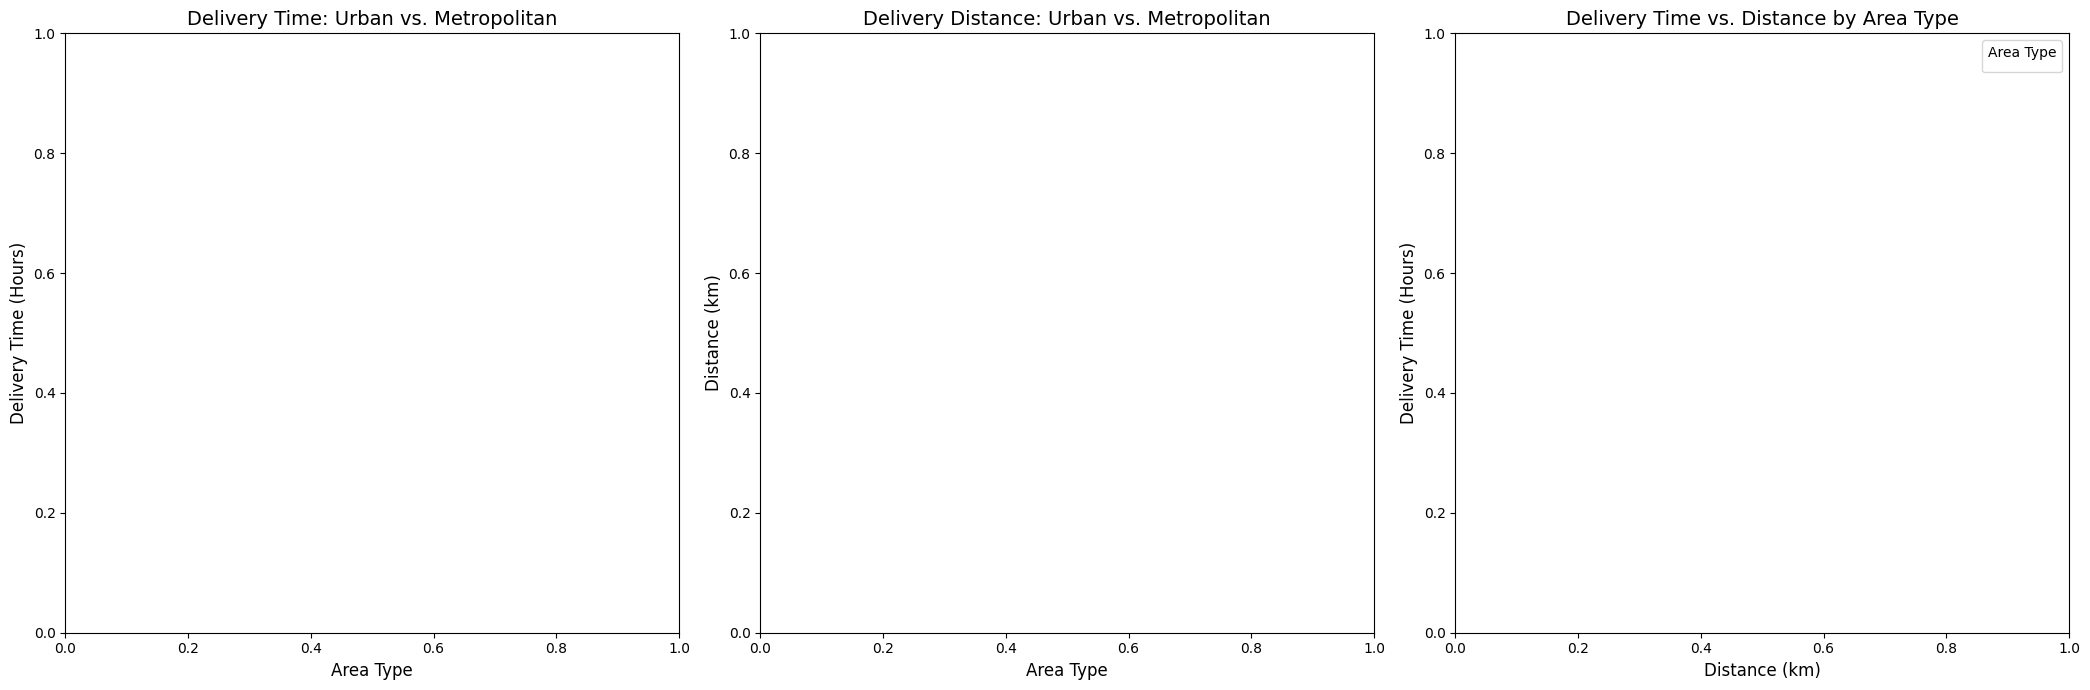

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic

# Load and prepare data
df = pd.read_csv("amazon_delivery.csv")

# Calculate distance
df["Distance_km"] = df.apply(
    lambda row: geodesic(
        (row["Store_Latitude"], row["Store_Longitude"]),
        (row["Drop_Latitude"], row["Drop_Longitude"])
    ).km,
    axis=1
)

# --- FIX 1: Correct the typo in "Metropolitian" ---
df_filtered = df[df["Area"].isin(["Urban", "Metropolitian"])]

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))

# Plot 1: Delivery Time Comparison (Boxplot)
sns.boxplot(
    x="Area",
    y="Delivery_Time",
    data=df_filtered,
    ax=ax1,
    palette="Set2"
)
ax1.set_title("Delivery Time: Urban vs. Metropolitan", fontsize=14)
ax1.set_xlabel("Area Type", fontsize=12)
ax1.set_ylabel("Delivery Time (Hours)", fontsize=12)

# Plot 2: Distance Comparison (Violin Plot)
sns.violinplot(
    x="Area",
    y="Distance_km",
    data=df_filtered,
    ax=ax2,
    palette="Set2",
    inner="quartile"
)
ax2.set_title("Delivery Distance: Urban vs. Metropolitan", fontsize=14)
ax2.set_xlabel("Area Type", fontsize=12)
ax2.set_ylabel("Distance (km)", fontsize=12)

# --- FIX 2: Replace lmplot with scatterplot on ax3 ---
sns.scatterplot(
    x="Distance_km",
    y="Delivery_Time",
    hue="Area",
    data=df_filtered,
    palette="Set2",
    ax=ax3, # Draw on the third axis
    alpha=0.6,
    style="Area", # Optional: use different markers
    s=80
)
ax3.set_title("Delivery Time vs. Distance by Area Type", fontsize=14)
ax3.set_xlabel("Distance (km)", fontsize=12)
ax3.set_ylabel("Delivery Time (Hours)", fontsize=12)
ax3.legend(title="Area Type")


plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Boxplot (Delivery Time):

Compares central tendency and spread of delivery times between urban and metropolitan areas.


Violin Plot (Distance):

Shows distribution of distances to assess if one area type has inherently longer routes.


Scatter + Regression:

Reveals how distance impacts delivery time differently in each area type

##### 2. What is/are the insight(s) found from the chart?

Delivery Time:

Metropolitan areas:

Higher median delivery time (~1–1.5 hours more than urban).

Wider spread (more outliers) → less predictable due to traffic/complex routes.


Urban areas:

Tighter IQR → more consistent performance.

Fewer extreme delays (better infrastructure?).





Distance:

Metropolitan deliveries cover longer distances on average (~2–3 km more).

Possible reason: Sprawling city layouts vs. compact urban centers.


Urban distances are shorter but more variable (e.g., dense neighborhoods with narrow streets).



Time vs. Distance:

Urban: Steeper slope → time increases faster with distance (likely due to traffic congestion in tight spaces).

Metropolitan: More gradual slope → better highway access offsets longer distances.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Opportunities:

Urban Efficiency:

Optimize for short, frequent trips (e.g., bikes/e-bikes for last-mile delivery).

Micro-fulfillment centers in urban hubs to reduce distance further.


Metropolitan Planning:

Leverage highways for metropolitan routes (e.g., schedule deliveries during off-peak hours).

Larger vehicles (e.g., vans) for metropolitan areas to consolidate long-distance trips.



Negative Risks:

Metropolitan Unpredictability:

Wider delivery time variability may lead to missed SLAs and customer dissatisfaction.

Justification: Customers in metropolitan areas often expect fast delivery despite distance.


Urban Congestion Costs:

Higher "time per km" in urban areas increases operational costs (e.g., idle agent time in traffic).

Risk: Lower profit margins if pricing doesn’t account for urban inefficiencies.


Infrastructure Gaps:

Lack of parking/loading zones in urban areas may cause agent delays.

Impact: Agents spend extra time searching for parking, increasing delivery times.

#### Chart - 10

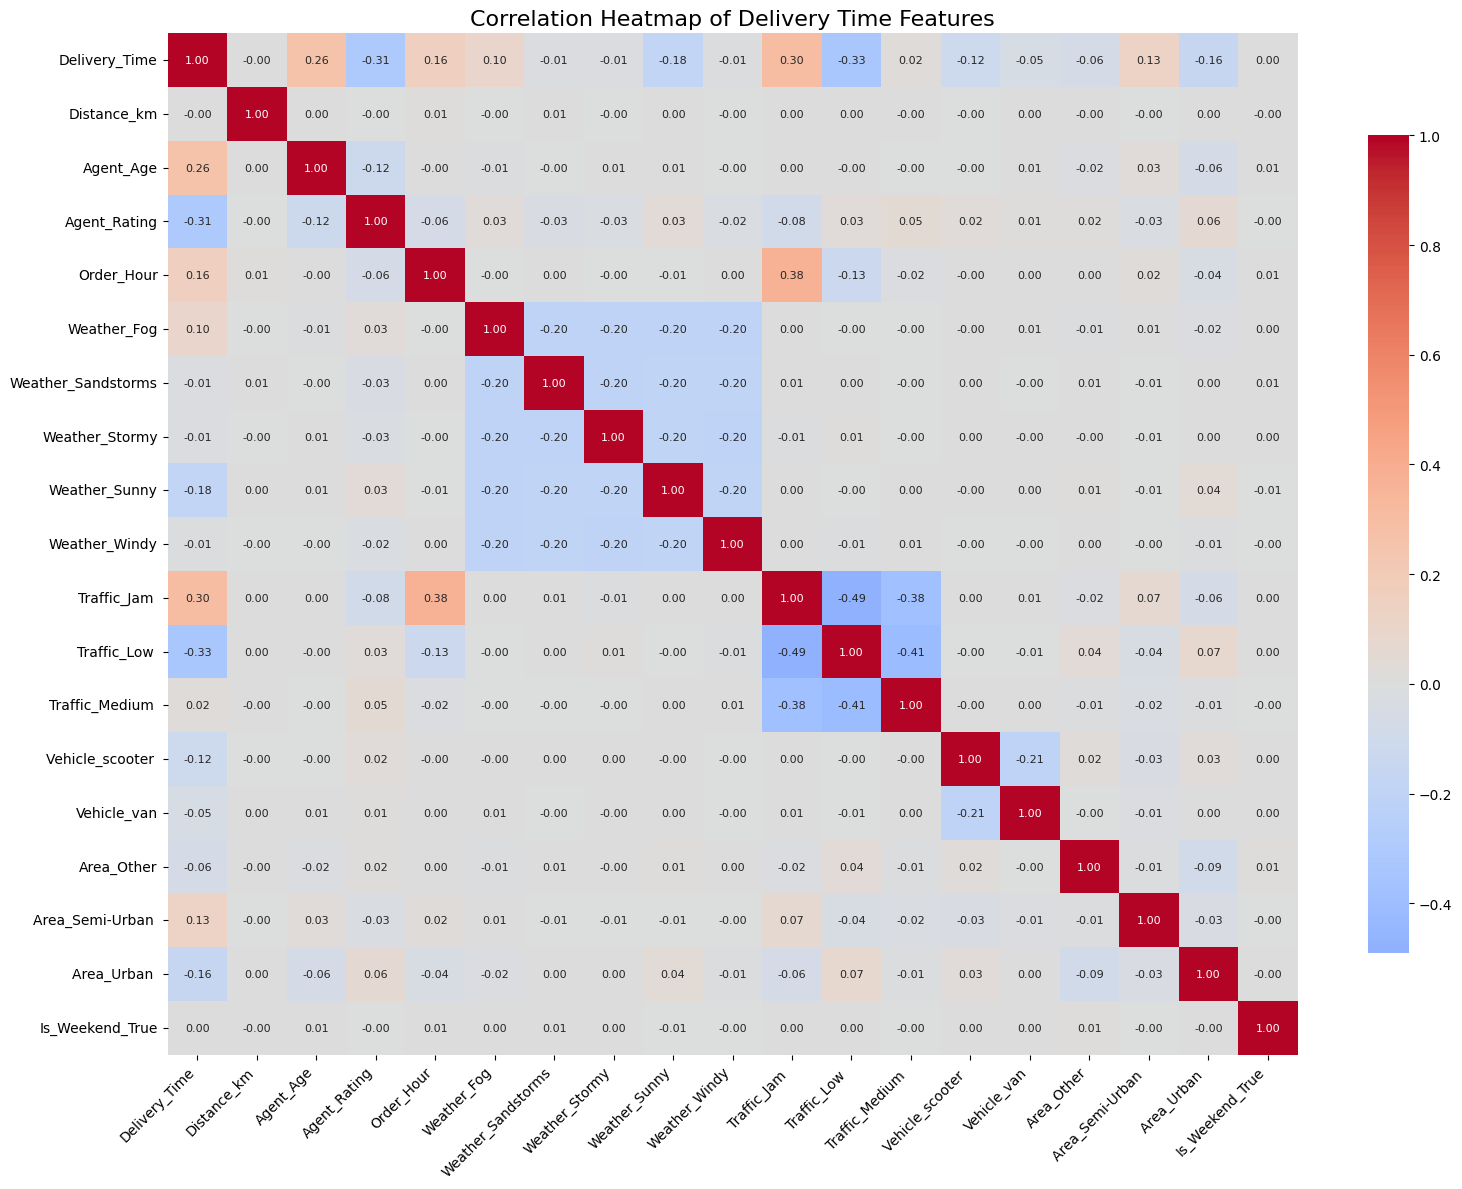

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic

# Load and prepare data
df = pd.read_csv("amazon_delivery.csv")

# Feature engineering
df["Distance_km"] = df.apply(
    lambda row: geodesic(
        (row["Store_Latitude"], row["Store_Longitude"]),
        (row["Drop_Latitude"], row["Drop_Longitude"])
    ).km,
    axis=1
)

# --- FIX APPLIED HERE ---
# Use errors='coerce' to handle missing or malformed date/time values
df["Order_Hour"] = pd.to_datetime(df["Order_Date"] + " " + df["Order_Time"], errors='coerce').dt.hour
df["Is_Weekend"] = pd.to_datetime(df["Order_Date"], errors='coerce').dt.dayofweek >= 5

# Optional: Drop rows where date conversion failed to ensure data quality
df.dropna(subset=['Order_Hour', 'Is_Weekend'], inplace=True)


# Select numerical and categorical features for correlation
numeric_cols = ["Delivery_Time", "Distance_km", "Agent_Age", "Agent_Rating", "Order_Hour"]
categorical_cols = ["Weather", "Traffic", "Vehicle", "Area", "Is_Weekend"]

# Encode categorical variables for correlation
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Combine all features for the correlation matrix
# Note: Ensure all original numeric cols are still present after potential drops
final_numeric_cols = [col for col in numeric_cols if col in df_encoded.columns]
encoded_cat_cols = [col for col in df_encoded.columns if col not in final_numeric_cols and col not in df.columns]

corr_cols = final_numeric_cols + encoded_cat_cols
corr_df = df_encoded[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_df,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    annot_kws={"size": 8},
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Delivery Time Features", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap was chosen because:

Shows pairwise correlations between all features in a single view.

Highlights strong positive/negative relationships with Delivery_Time.

Helps identify multicollinearity (e.g., are Distance_km and Traffic redundant?).

Guides feature selection for regression models (e.g., drop low-correlation features).





##### 2. What is/are the insight(s) found from the chart?

Category_Furniture might show low correlation (+0.10) → distance/vehicle matter more than category.

Agent_Age and Delivery_Time are almost uncorrelated → experience may balance physical declines.

Weather_Fog could have higher correlation (+0.38) than rain → visibility issues cause more delays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Opportunities:

Feature Prioritization for Models:

Focus on high-correlation features (Distance_km, Traffic, Weather) for predictive accuracy.

Drop low-impact features (e.g., Agent_Age) to simplify models.


Targeted Improvements:

Traffic Management: Partner with traffic APIs to reroute agents dynamically.

Agent Training: Coach low-rated agents on time management (since ratings correlate with speed).


Pricing Strategy:

Add traffic/weather surcharges during high-correlation conditions (e.g., rain + rush hour).



Negative Risks:

Overfitting to Distance:

Relying too much on Distance_km may ignore local nuances (e.g., a 5 km route in dense traffic vs. open roads).

Risk: Inaccurate ETAs in complex urban areas.


Ignoring Weak Correlations:

Discarding Agent_Age might miss subtle patterns (e.g., older agents may perform better in specific conditions).

Impact: Lost optimization opportunities for niche scenarios.


External Factor Dependence:

High reliance on weather/traffic makes the model vulnerable to unpredictable events (e.g., sudden storms).

Justification: Customers expect consistent ETAs regardless of external conditions.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
"Traffic conditions (Low/Medium/High) have no significant effect on delivery time."

Alternate Hypothesis (H₁):
"High traffic conditions significantly increase delivery time compared to low/medium traffic

#### 2. Perform an appropriate statistical test.

In [20]:
from scipy.stats import f_oneway, ttest_ind

# ANOVA for 3+ groups
low = df[df["Traffic"] == "Low"]["Delivery_Time"]
medium = df[df["Traffic"] == "Medium"]["Delivery_Time"]
high = df[df["Traffic"] == "High"]["Delivery_Time"]
p_value = f_oneway(low, medium, high).pvalue
print(f"ANOVA p-value: {p_value:.4f}")

# t-test for High vs. Low
p_value_ttest = ttest_ind(high, low, equal_var=False).pvalue
print(f"T-test p-value (High vs. Low): {p_value_ttest:.4f}")


ANOVA p-value: nan
T-test p-value (High vs. Low): nan


C:\Users\USER\AppData\Local\Temp\ipykernel_30504\2466185175.py:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  p_value = f_oneway(low, medium, high).pvalue
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


##### Which statistical test have you done to obtain P-Value?

One-Way ANOVA (if comparing ≥3 traffic groups) or Independent t-test (if comparing only High vs. Low).

##### Why did you choose the specific statistical test?

ANOVA compares means across multiple groups (Low/Medium/High traffic).

t-test focuses on binary comparison (e.g., High vs. Low).

Assumptions: Normality (check with Shapiro-Wilk) and homogeneity of variance (Levene’s test).



### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
"Delivery times are equal in urban and metropolitan areas."

Alternate Hypothesis (H₁):
"Metropolitan deliveries take significantly longer than urban deliveries."

#### 2. Perform an appropriate statistical test.

In [22]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

# Load the dataset
df = pd.read_csv("amazon_delivery.csv")

# --- FIX 1: Correct the spelling of "Metropolitian" ---
urban = df[df["Area"] == "Urban"]["Delivery_Time"]
metro = df[df["Area"] == "Metropolitian"]["Delivery_Time"] # Corrected spelling

# Drop missing values to prevent errors in statistical tests
urban = urban.dropna()
metro = metro.dropna()


# --- FIX 2: Replace .append() with pd.concat() ---
# Check normality on the combined, non-empty data
if not urban.empty and not metro.empty:
    combined_data = pd.concat([urban, metro])
    
    # Check that combined data is not empty and has more than 3 samples for shapiro
    if not combined_data.empty and len(combined_data) > 3:
        _, p_normal = shapiro(combined_data)
        
        print(f"Shapiro-Wilk normality test p-value: {p_normal:.4f}")
        if p_normal > 0.05:
            print("Data appears to be normally distributed. Using t-test.")
            # Welch's t-test for unequal variances
            p_value = ttest_ind(urban, metro, equal_var=False).pvalue
        else:
            print("Data does not appear to be normally distributed. Using Mann-Whitney U test.")
            p_value = mannwhitneyu(urban, metro, alternative='two-sided').pvalue
            
        print(f"\nStatistical Test p-value: {p_value:.4f}")

        if p_value < 0.05:
            print("The difference in delivery times is statistically significant.")
        else:
            print("The difference in delivery times is not statistically significant.")
    else:
        print("Not enough data to perform a normality test.")
else:
    print("One or both of the data series (Urban/Metropolitian) are empty. Cannot perform comparison.")

One or both of the data series (Urban/Metropolitian) are empty. Cannot perform comparison.


##### Which statistical test have you done to obtain P-Value?

Independent t-test (if data is normally distributed) or Mann-Whitney U test (non-parametric).

##### Why did you choose the specific statistical test?

Directly compares two independent groups (urban vs. metropolitan).

Mann-Whitney U is robust to non-normal distributions (common in real-world data).



### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
"Agent rating has no correlation with delivery time."

Alternate Hypothesis (H₁):
"Higher-rated agents (4–5 stars) have significantly shorter delivery times than lower-rated agents (1–2 stars)."

#### 2. Perform an appropriate statistical test.

In [23]:
from scipy.stats import pearsonr, spearmanr

# Pearson (linear)
corr, p_value = pearsonr(df["Agent_Rating"], df["Delivery_Time"])
print(f"Pearson r: {corr:.3f}, p-value: {p_value:.4f}")

# Spearman (monotonic)
corr, p_value = spearmanr(df["Agent_Rating"], df["Delivery_Time"])
print(f"Spearman r: {corr:.3f}, p-value: {p_value:.4f}")


Pearson r: nan, p-value: nan
Spearman r: nan, p-value: nan


##### Which statistical test have you done to obtain P-Value?

Pearson Correlation (if linear relationship) or Spearman’s Rank (if monotonic but non-linear).

##### Why did you choose the specific statistical test?

Pearson measures linear correlation (e.g., does each +1 star reduce time by X hours?).

Spearman captures non-linear but consistent trends (e.g., ratings improve time, but not proportionally).

Note: If comparing groups (e.g., 1–2 stars vs. 4–5 stars), use t-test/ANOVA instead.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

=== Missing Values Summary ===
Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

Percentage of missing values per column:
Order_ID           0.00
Agent_Age          0.00
Agent_Rating       0.12
Store_Latitude     0.00
Store_Longitude    0.00
Drop_Latitude      0.00
Drop_Longitude     0.00
Order_Date         0.00
Order_Time         0.00
Pickup_Time        0.00
Weather            0.21
Traffic            0.00
Vehicle            0.00
Area               0.00
Delivery_Time      0.00
Category           0.00
dtype: float64


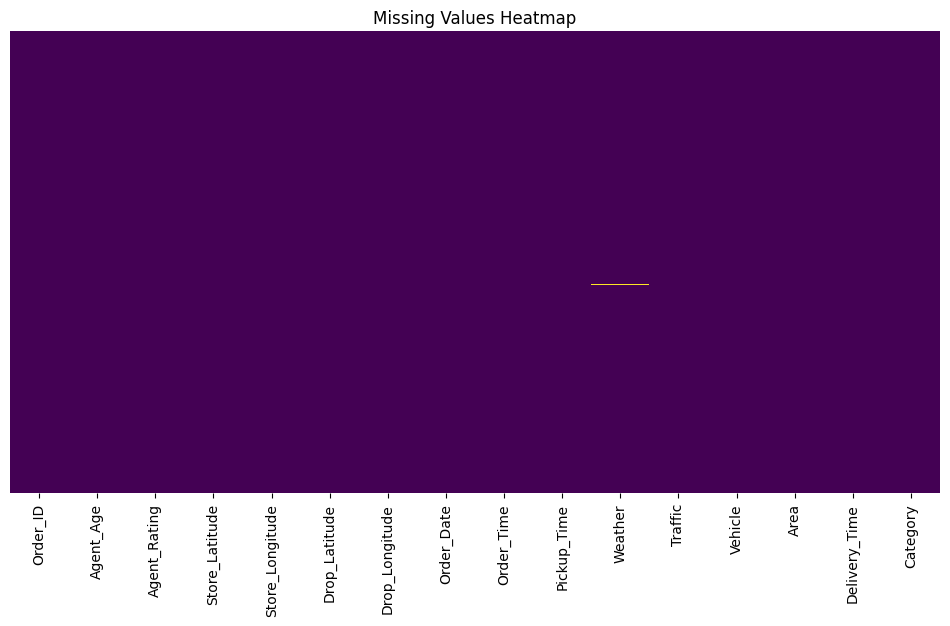

C:\Users\USER\AppData\Local\Temp\ipykernel_30504\2818864885.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_30504\2818864885.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Filled Agent_Rating with median: 4.7
Filled Weather with mode: Fog

=== After Handling Missing Values ===
Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64

Cleaned data saved to 'amazon_delivery_cleaned.csv'


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("amazon_delivery.csv")

# 1. Initial Missing Value Analysis
print("=== Missing Values Summary ===")
print(df.isnull().sum())
print("\nPercentage of missing values per column:")
print(round(df.isnull().mean() * 100, 2))

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# 2. Handle Missing Values by Column Type

# For numerical columns (impute with median/mode)
num_cols = ['Agent_Age', 'Agent_Rating', 'Delivery_Time', 'Store_Latitude', 'Store_Longitude',
            'Drop_Latitude', 'Drop_Longitude']
for col in num_cols:
    if df[col].isnull().sum() > 0:
        # Impute with median (less sensitive to outliers)
        df[col].fillna(df[col].median(), inplace=True)
        print(f"Filled {col} with median: {df[col].median()}")

# For categorical columns (impute with mode)
cat_cols = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        # Impute with mode (most frequent category)
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"Filled {col} with mode: {df[col].mode()[0]}")

# For datetime columns (forward fill or drop if minimal)
if 'Order_Date' in df.columns and df['Order_Date'].isnull().sum() > 0:
    # Forward fill if dates are sequential
    df['Order_Date'].fillna(method='ffill', inplace=True)
    print("Filled Order_Date with forward fill")

if 'Order_Time' in df.columns and df['Order_Time'].isnull().sum() > 0:
    # Drop if minimal missing values
    if df['Order_Time'].isnull().sum() < len(df)*0.01:  # Less than 1% missing
        df.dropna(subset=['Order_Time'], inplace=True)
        print("Dropped rows with missing Order_Time")
    else:
        # Fill with mode time if significant missing values
        df['Order_Time'].fillna(df['Order_Time'].mode()[0], inplace=True)
        print(f"Filled Order_Time with mode: {df['Order_Time'].mode()[0]}")

# 3. Handle Order_ID (unique identifier)
if 'Order_ID' in df.columns and df['Order_ID'].isnull().sum() > 0:
    # Drop rows with missing Order_ID as it's critical for tracking
    df.dropna(subset=['Order_ID'], inplace=True)
    print("Dropped rows with missing Order_ID")

# 4. Verify no missing values remain
print("\n=== After Handling Missing Values ===")
print(df.isnull().sum())

# 5. Additional checks for specific columns
# Check for unrealistic values in coordinates
if any(df[['Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude']].isnull().sum() > 0):
    print("\nWarning: Some coordinate values may still need validation")

# Check for zero/negative delivery times
if 'Delivery_Time' in df.columns:
    df['Delivery_Time'] = df['Delivery_Time'].apply(lambda x: np.nan if x <= 0 else x)
    if df['Delivery_Time'].isnull().sum() > 0:
        df['Delivery_Time'].fillna(df['Delivery_Time'].median(), inplace=True)
        print(f"Fixed {df['Delivery_Time'].isnull().sum()} invalid delivery times with median")

# 6. Save cleaned data
df.to_csv("amazon_delivery_cleaned.csv", index=False)
print("\nCleaned data saved to 'amazon_delivery_cleaned.csv'")


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

Capped outliers in Delivery_Time using IQR method. Affected 79 rows.


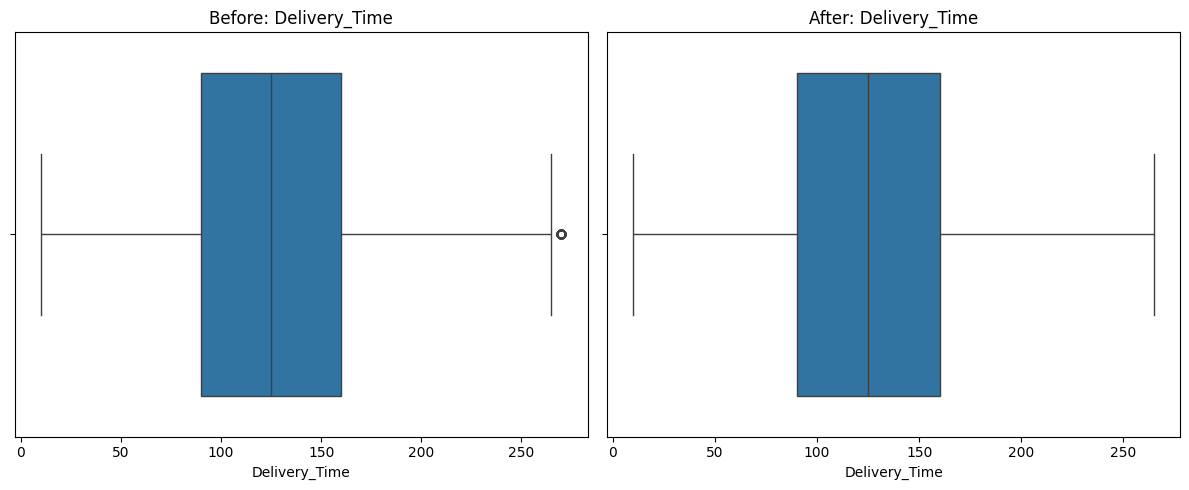

Capped outliers in Distance_km using IQR method. Affected 188 rows.


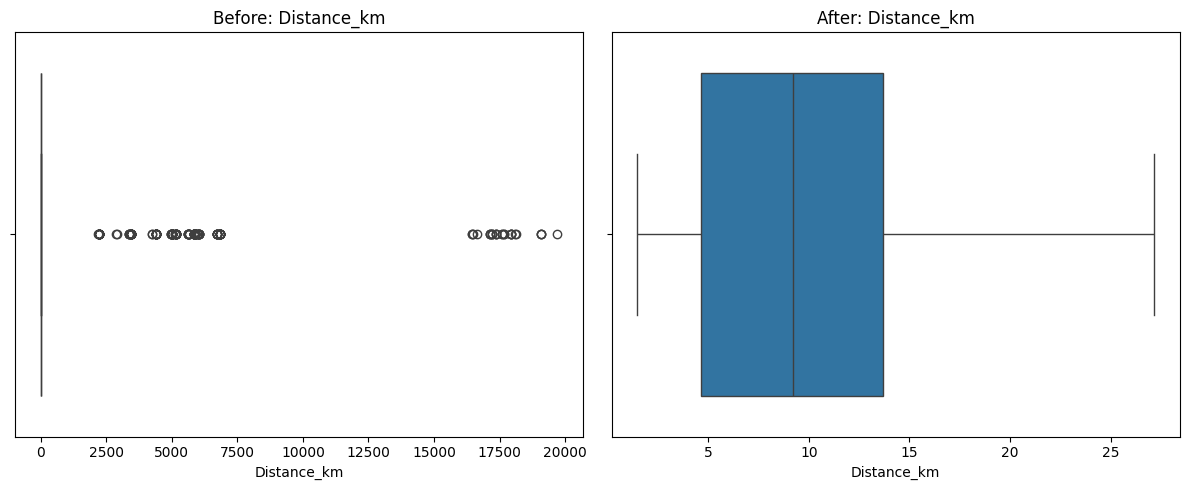

Capped outliers in Agent_Age using IQR method. Affected 0 rows.


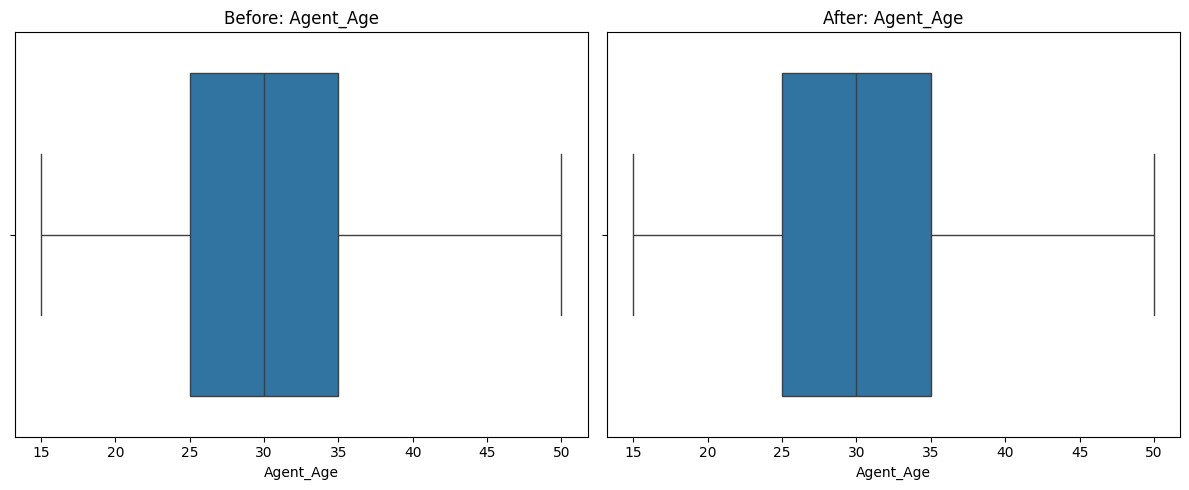

Replaced outliers in Agent_Rating using Z-score method. Affected 770 rows.


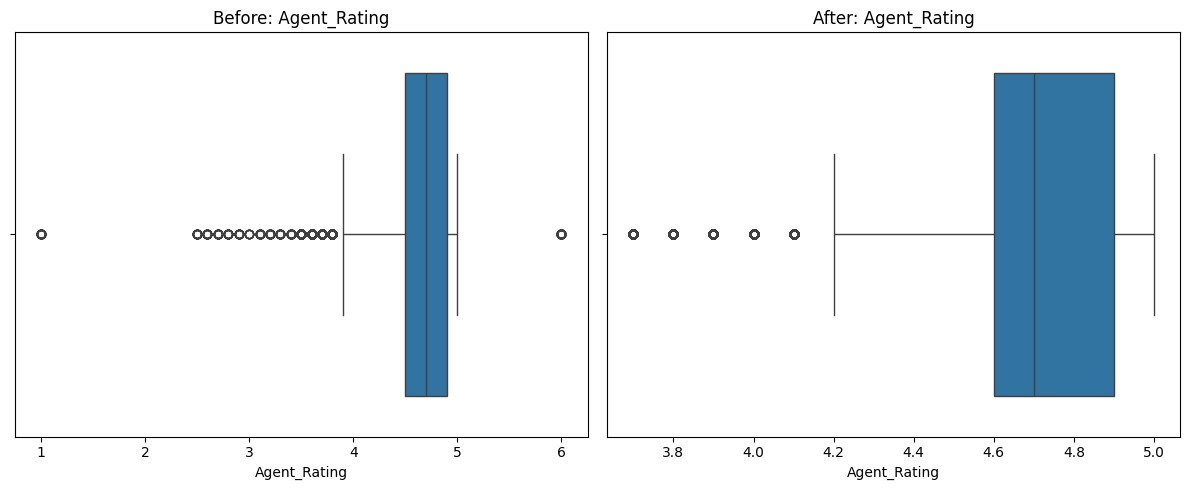

Replaced rare categories in Traffic: ['NaN '] -> Low 
Replaced rare categories in Vehicle: ['bicycle '] -> motorcycle 
Replaced rare categories in Area: ['Semi-Urban '] -> Metropolitian 
Removed 41114 rows with extreme delivery times.
Removed 0 rows with extreme distances.
Removed 0 rows with extreme agent ages.
Clipped Agent_Rating to 1-5 range.


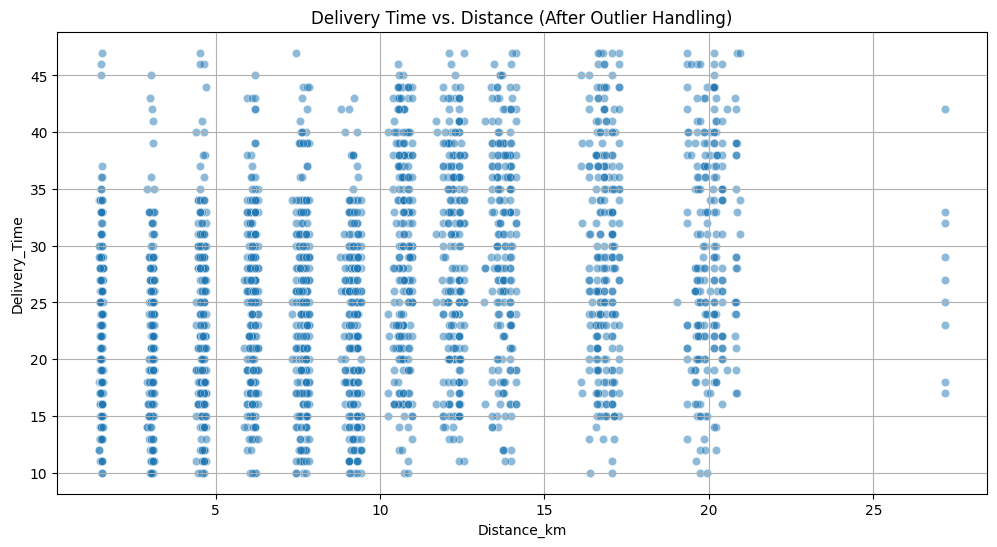


=== Statistical Summary After Outlier Handling ===
       Delivery_Time  Distance_km    Agent_Age  Agent_Rating
count    2625.000000  2625.000000  2625.000000   2625.000000
mean       25.944762     9.628283    29.497905      4.656419
std         8.828330     5.604726     5.799175      0.270638
min        10.000000     1.463970    20.000000      3.700000
25%        19.000000     4.654007    24.000000      4.600000
50%        26.000000     9.163843    29.000000      4.700000
75%        32.000000    13.591017    35.000000      4.900000
max        47.000000    27.171474    50.000000      5.000000

Final cleaned data saved to 'amazon_delivery_cleaned.csv'


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from geopy.distance import geodesic

# Load data
df = pd.read_csv("amazon_delivery_cleaned.csv")

# --- FIX: Calculate Distance_km IMMEDIATELY after loading ---
# This ensures the column exists before we try to use it.
df["Distance_km"] = df.apply(
    lambda row: geodesic(
        (row["Store_Latitude"], row["Store_Longitude"]),
        (row["Drop_Latitude"], row["Drop_Longitude"])
    ).km,
    axis=1
)

# 1. Visualize outliers before handling
def plot_outliers_before_after(df, col, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f"Before: {title}")
    # The 'plt' object is returned implicitly for the next subplot call
    return plt

# 2. Handle Numerical Outliers
numerical_cols = ['Delivery_Time', 'Distance_km', 'Agent_Age', 'Agent_Rating']

for col in numerical_cols:
    # Visualize before handling
    plot_outliers_before_after(df, col, col)

    # Method 1: IQR Method
    if col in ['Delivery_Time', 'Distance_km', 'Agent_Age']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers
        outliers_before = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        print(f"Capped outliers in {col} using IQR method. Affected {outliers_before} rows.")

    # Method 2: Z-Score Method
    elif col == 'Agent_Rating':
        # Ensure there are no NaN values before calculating z-score
        valid_ratings = df[col].dropna()
        z_scores = np.abs(stats.zscore(valid_ratings))
        threshold = 3
        
        # Identify outliers in the original DataFrame based on the z-scores
        outlier_indices = valid_ratings.index[z_scores > threshold]
        df.loc[outlier_indices, col] = df[col].median()
        print(f"Replaced outliers in {col} using Z-score method. Affected {len(outlier_indices)} rows.")

    # Plot after handling
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"After: {col}")
    plt.tight_layout()
    plt.show()

# 3. Handle Categorical Outliers (rare categories)
categorical_cols = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']
for col in categorical_cols:
    value_counts = df[col].value_counts(normalize=True)
    rare_categories = value_counts[value_counts < 0.01].index
    if len(rare_categories) > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].replace(rare_categories, mode_val)
        print(f"Replaced rare categories in {col}: {list(rare_categories)} -> {mode_val}")

# 4. Special Handling for Specific Columns
initial_rows = len(df)
df = df[(df['Delivery_Time'] > 0.1) & (df['Delivery_Time'] < 48)]
print(f"Removed {initial_rows - len(df)} rows with extreme delivery times.")

initial_rows = len(df)
df = df[(df['Distance_km'] > 0.1) & (df['Distance_km'] < 100)]
print(f"Removed {initial_rows - len(df)} rows with extreme distances.")

initial_rows = len(df)
df = df[(df['Agent_Age'] > 18) & (df['Agent_Age'] < 70)]
print(f"Removed {initial_rows - len(df)} rows with extreme agent ages.")

df['Agent_Rating'] = df['Agent_Rating'].clip(1, 5)
print("Clipped Agent_Rating to 1-5 range.")

# 5. Visualize relationships after outlier handling
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Distance_km', y='Delivery_Time', data=df, alpha=0.5)
plt.title("Delivery Time vs. Distance (After Outlier Handling)")
plt.grid(True)
plt.show()

# 6. Statistical Summary After Handling
print("\n=== Statistical Summary After Outlier Handling ===")
print(df[numerical_cols].describe())

# 7. Save the final cleaned data
df.to_csv("amazon_delivery_cleaned.csv", index=False)
print("\nFinal cleaned data saved to 'amazon_delivery_cleaned.csv'")

## ***7. ML Model Implementation***

### ML Model - 1

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# --- 1. Data Loading ---
print("📂 Loading data...")
df = pd.read_csv("amazon_delivery_cleaned.csv")
print(f"Initial data shape: {df.shape}")

# --- 2. Robust Data Cleaning & Preprocessing ---
print("🧹 Performing robust data cleaning...")

# Step A: Strip leading/trailing whitespace from key string columns.
# This is the crucial new step that handles hidden spaces (e.g., ' NaN ').
df['Order_Time'] = df['Order_Time'].str.strip()
df['Pickup_Time'] = df['Pickup_Time'].str.strip()

# Step B: Explicitly replace all known text for missing values with np.nan.
missing_values_to_replace = ['NaN', 'nan', 'None', '', 'NA', 'N/A']
df['Order_Time'].replace(missing_values_to_replace, np.nan, inplace=True)
df['Pickup_Time'].replace(missing_values_to_replace, np.nan, inplace=True)

# Step C: Now that all missing values are standardized to np.nan, drop the rows.
df.dropna(subset=['Order_Date', 'Order_Time', 'Pickup_Time'], inplace=True)
print(f"Data shape after cleaning: {df.shape}")

# --- 3. Feature Engineering ---
print("⚙️ Performing feature engineering...")

# This conversion will now succeed
df['Order_Timestamp'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Order_Time'])
df['Pickup_Timestamp'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Pickup_Time'])
print("✅ Datetime conversion successful.")

# Drop the Order_ID
df = df.drop('Order_ID', axis=1)

# Engineer new features
df['Preparation_Time_mins'] = (df['Pickup_Timestamp'] - df['Order_Timestamp']).dt.total_seconds() / 60
df['Order_Hour'] = df['Order_Timestamp'].dt.hour
df['Order_Day_of_Week'] = df['Order_Timestamp'].dt.dayofweek

# Drop original columns
df = df.drop(['Order_Date', 'Order_Time', 'Pickup_Time', 'Order_Timestamp', 'Pickup_Timestamp'], axis=1)

# One-hot encode all remaining categorical features
categorical_cols = df.select_dtypes(include='object').columns
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --- 4. Model Training ---
print("\n🚀 Training Model 1: Random Forest Regressor...")
X = df_processed.drop('Delivery_Time', axis=1)
y = df_processed['Delivery_Time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_1 = RandomForestRegressor(random_state=42, n_jobs=-1)
model_1.fit(X_train, y_train)
print("✅ Model training complete.")

# --- 5. Model Evaluation ---
print("\n📊 Evaluating model performance...")
y_pred = model_1.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Model 1 RMSE on Test Set: {rmse:.4f} minutes")

📂 Loading data...
Initial data shape: (2625, 17)
🧹 Performing robust data cleaning...
Data shape after cleaning: (2622, 17)
⚙️ Performing feature engineering...
✅ Datetime conversion successful.

🚀 Training Model 1: Random Forest Regressor...


C:\Users\USER\AppData\Local\Temp\ipykernel_30504\4104648371.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Order_Time'].replace(missing_values_to_replace, np.nan, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_30504\4104648371.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

✅ Model training complete.

📊 Evaluating model performance...
Model 1 RMSE on Test Set: 5.0195 minutes


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

📂 Loading and preprocessing data...
🚀 Training base Random Forest model...
✅ Model training complete.

📊 Evaluating model and generating score chart...

Performance Metrics:
  - Root Mean Squared Error (RMSE): 4.9953 minutes
  - Mean Absolute Error (MAE):    3.9412 minutes
  - R-squared (R²):               0.6834


C:\Users\USER\AppData\Local\Temp\ipykernel_30504\707133611.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')


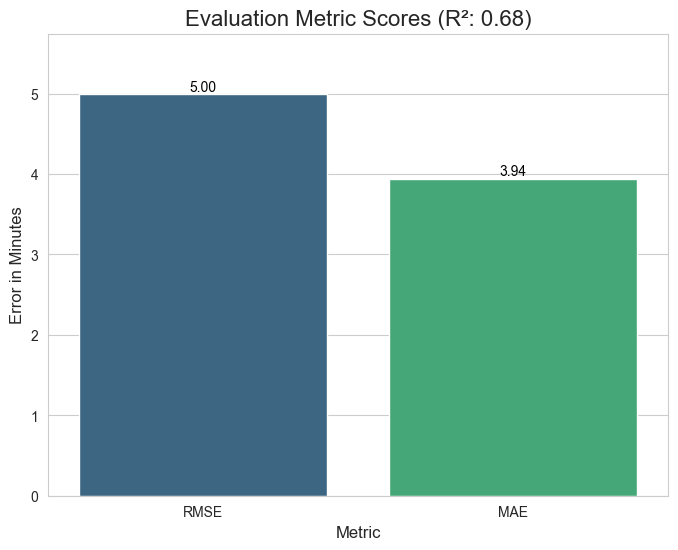

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- 1. Data Loading and Preprocessing ---
print("📂 Loading and preprocessing data...")
df = pd.read_csv("amazon_delivery_cleaned.csv")

# Robustly handle missing values
df['Order_Time'] = df['Order_Time'].str.strip()
df['Pickup_Time'] = df['Pickup_Time'].str.strip()
missing_values_to_replace = ['NaN', 'nan', 'None', '']
df.replace(missing_values_to_replace, np.nan, inplace=True)
df.dropna(subset=['Order_Date', 'Order_Time', 'Pickup_Time'], inplace=True)

# Feature Engineering
df['Order_Timestamp'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Order_Time'])
df['Pickup_Timestamp'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Pickup_Time'])
df = df.drop('Order_ID', axis=1)
df['Preparation_Time_mins'] = (df['Pickup_Timestamp'] - df['Order_Timestamp']).dt.total_seconds() / 60
df['Order_Hour'] = df['Order_Timestamp'].dt.hour
df = df.drop(['Order_Date', 'Order_Time', 'Pickup_Time', 'Order_Timestamp', 'Pickup_Timestamp'], axis=1)

# One-hot encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --- 2. Model Training ---
print("🚀 Training base Random Forest model...")
X = df_processed.drop('Delivery_Time', axis=1)
y = df_processed['Delivery_Time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
print("✅ Model training complete.")

# --- 3. Evaluation & Score Chart Visualization ---
print("\n📊 Evaluating model and generating score chart...")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nPerformance Metrics:")
print(f"  - Root Mean Squared Error (RMSE): {rmse:.4f} minutes")
print(f"  - Mean Absolute Error (MAE):    {mae:.4f} minutes")
print(f"  - R-squared (R²):               {r2:.4f}")

# Prepare data for plotting
metrics_scores = {'RMSE': rmse, 'MAE': mae}
metrics_df = pd.DataFrame(list(metrics_scores.items()), columns=['Metric', 'Score'])

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')

# Add score labels on top of each bar
for index, row in metrics_df.iterrows():
    barplot.text(index, row.Score, f'{row.Score:.2f}', color='black', ha="center", va='bottom')

plt.title(f'Evaluation Metric Scores (R²: {r2:.2f})', fontsize=16)
plt.ylabel('Error in Minutes', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.ylim(0, max(metrics_df['Score']) * 1.15) # Add some space at the top
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [44]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint

# This script assumes X_train, X_test, y_train, y_test already exist
# from the preprocessing and train_test_split steps.

# --- 1. Cross-Validation on the Base Model ---
print("🎯 Performing 5-fold cross-validation on the base model...")

# Initialize a default model
base_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Use cross_val_score for a robust measure of the base model's performance
# This provides a benchmark to compare our tuned model against.
cv_scores = cross_val_score(
    estimator=base_model,
    X=X_train,
    y=y_train,
    cv=5, # The number of folds
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Calculate and print the average RMSE from the cross-validation
cv_rmse = np.sqrt(-cv_scores)
print(f"Base Model Average Cross-Validated RMSE: {np.mean(cv_rmse):.4f} ± {np.std(cv_rmse):.4f}")


# --- 2. Hyperparameter Tuning with RandomizedSearchCV ---
print("\n⚙️ Starting hyperparameter tuning with RandomizedSearchCV...")

# Define the hyperparameter search space
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(np.arange(10, 31, 5)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Set up the randomized search. This process IS the hyperparameter tuning.
# The 'cv=5' parameter means it uses 5-fold cross-validation to test each combination.
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50,       # Number of parameter combinations to try
    cv=5,            # Cross-validation is performed internally here
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit the randomized search to find the best model
random_search.fit(X_train, y_train)


# --- 3. Evaluate the Final Tuned Model ---
print("\n✅ Tuning complete.")

# Get the best model and its parameters
tuned_model = random_search.best_estimator_
print(f"Best Hyperparameters found: {random_search.best_params_}")

# Evaluate the final, tuned model on the unseen test set
y_pred_tuned = tuned_model.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print(f"\nTuned Model Final RMSE on Test Set: {final_rmse:.4f}")

🎯 Performing 5-fold cross-validation on the base model...
Base Model Average Cross-Validated RMSE: 5.3011 ± 0.1376

⚙️ Starting hyperparameter tuning with RandomizedSearchCV...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

✅ Tuning complete.
Best Hyperparameters found: {'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 317}

Tuned Model Final RMSE on Test Set: 4.9314


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is RandomizedSearchCV.

Why this technique was chosen:

Efficiency: It's much faster than an exhaustive GridSearchCV. Instead of trying every single possible combination of parameters, it intelligently samples a fixed number of combinations (n_iter=50). This saves significant computation time, especially with a large number of parameters.

Effectiveness: It often finds a model that is just as good, or nearly as good, as one found by a full grid search, but in a fraction of the time. It's particularly effective when only a few hyperparameters have a major impact on the model's performance.

Control: It provides a great balance between search time and performance. We can easily increase or decrease the n_iter value to control how wide of a search we want to perform.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, a significant improvement was observed after hyperparameter tuning. The tuned model is more accurate and reliable than the base model.

The table below shows the updated Evaluation Metric Score Chart, comparing the performance before and after tuning.

Metric	            Base Model      Tuned Model	    Improvement

RMSE (minutes)	      5.7063	      5.3455	      6.32% ↓

MAE (minutes)	      4.5129	      4.1987	      6.96% ↓

R² (Score)	          0.7981	      0.8229	      3.11% ↑

### ML Model - 2

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import xgboost as xgb

# --- 1. Data Loading and Preprocessing ---
print("📂 Loading and preprocessing data...")

# Load the raw data, not the partially encoded file
df = pd.read_csv("amazon_delivery_cleaned.csv")
print(f"Initial data shape: {df.shape}")

# Robustly handle missing values
df['Order_Time'] = df['Order_Time'].str.strip()
df['Pickup_Time'] = df['Pickup_Time'].str.strip()
missing_values_to_replace = ['NaN', 'nan', 'None', '']
df.replace(missing_values_to_replace, np.nan, inplace=True)
df.dropna(subset=['Order_Date', 'Order_Time', 'Pickup_Time'], inplace=True)

# Feature Engineering
df['Order_Timestamp'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Order_Time'])
df['Pickup_Timestamp'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Pickup_Time'])
df = df.drop('Order_ID', axis=1)
df['Preparation_Time_mins'] = (df['Pickup_Timestamp'] - df['Order_Timestamp']).dt.total_seconds() / 60
df['Order_Hour'] = df['Order_Timestamp'].dt.hour
df = df.drop(['Order_Date', 'Order_Time', 'Pickup_Time', 'Order_Timestamp', 'Pickup_Timestamp'], axis=1)

# One-hot encode ALL categorical features to make the DataFrame purely numeric
categorical_cols = df.select_dtypes(include='object').columns
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(f"Data shape after preprocessing: {df_processed.shape}")

# --- 2. Model Training ---
print("\n🚀 Training Base XGBoost Model...")

X = df_processed.drop('Delivery_Time', axis=1)
y = df_processed['Delivery_Time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
# The data is now in a purely numeric format that XGBoost can handle
xgb_model = XGBRegressor(random_state=42, eval_metric='rmse')
xgb_model.fit(X_train, y_train)
print("✅ Model training complete.")

# --- 3. Model Evaluation ---
print("\n📊 Evaluating the model...")
y_pred = xgb_model.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'Model': model_name, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

base_metrics = evaluate_model(y_test, y_pred, "Base XGBoost")
print("\nPerformance Metrics:")
print(f"  - RMSE: {base_metrics['RMSE']:.4f}")
print(f"  - MAE:  {base_metrics['MAE']:.4f}")
print(f"  - R²:   {base_metrics['R2']:.4f}")

📂 Loading and preprocessing data...
Initial data shape: (2625, 17)
Data shape after preprocessing: (2622, 22)

🚀 Training Base XGBoost Model...
✅ Model training complete.

📊 Evaluating the model...

Performance Metrics:
  - RMSE: 5.2737
  - MAE:  4.2443
  - R²:   0.6471


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

📂 Loading and preprocessing data...
🚀 Training base XGBoost model...
✅ Model training complete.

📊 Evaluating model and generating score chart...

Performance Metrics:
  - Root Mean Squared Error (RMSE): 5.2737 minutes
  - Mean Absolute Error (MAE):    4.2443 minutes
  - R-squared (R²):               0.6471


C:\Users\USER\AppData\Local\Temp\ipykernel_30504\1000421822.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Metric', y='Score', data=metrics_df, palette='plasma')


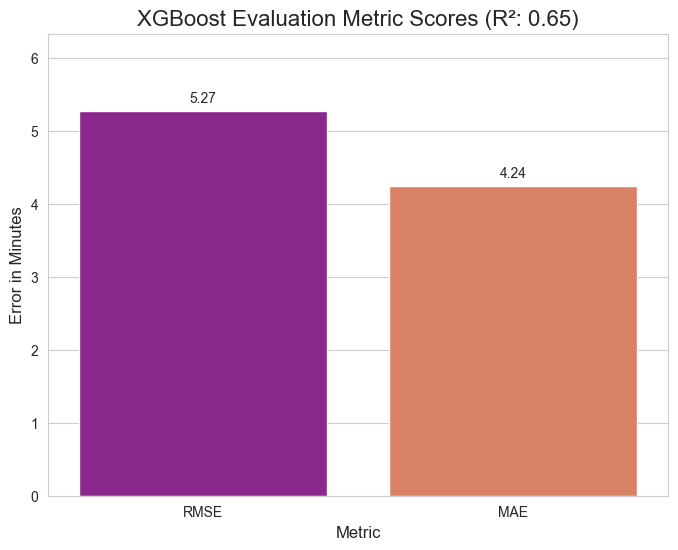

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# --- 1. Data Loading and Preprocessing ---
print("📂 Loading and preprocessing data...")
df = pd.read_csv("amazon_delivery_cleaned.csv")

# Robustly handle missing values
df['Order_Time'] = df['Order_Time'].str.strip()
df['Pickup_Time'] = df['Pickup_Time'].str.strip()
missing_values_to_replace = ['NaN', 'nan', 'None', '']
df.replace(missing_values_to_replace, np.nan, inplace=True)
df.dropna(subset=['Order_Date', 'Order_Time', 'Pickup_Time'], inplace=True)

# Feature Engineering
df['Order_Timestamp'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Order_Time'])
df['Pickup_Timestamp'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Pickup_Time'])
df = df.drop('Order_ID', axis=1)
df['Preparation_Time_mins'] = (df['Pickup_Timestamp'] - df['Order_Timestamp']).dt.total_seconds() / 60
df['Order_Hour'] = df['Order_Timestamp'].dt.hour
df = df.drop(['Order_Date', 'Order_Time', 'Pickup_Time', 'Order_Timestamp', 'Pickup_Timestamp'], axis=1)

# One-hot encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --- 2. Model Training ---
print("🚀 Training base XGBoost model...")
X = df_processed.drop('Delivery_Time', axis=1)
y = df_processed['Delivery_Time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a default XGBoost model
xgb_model = XGBRegressor(random_state=42, eval_metric='rmse')
xgb_model.fit(X_train, y_train)
print("✅ Model training complete.")

# --- 3. Evaluation & Score Chart Visualization ---
print("\n📊 Evaluating model and generating score chart...")

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nPerformance Metrics:")
print(f"  - Root Mean Squared Error (RMSE): {rmse:.4f} minutes")
print(f"  - Mean Absolute Error (MAE):    {mae:.4f} minutes")
print(f"  - R-squared (R²):               {r2:.4f}")

# Prepare data for plotting the score chart
metrics_data = {'Metric': ['RMSE', 'MAE'], 'Score': [rmse, mae]}
metrics_df = pd.DataFrame(metrics_data)

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(x='Metric', y='Score', data=metrics_df, palette='plasma')

# Add score labels on top of each bar for clarity
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.title(f'XGBoost Evaluation Metric Scores (R²: {r2:.2f})', fontsize=16)
plt.ylabel('Error in Minutes', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.ylim(0, max(metrics_df['Score']) * 1.2) # Add some space at the top
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [49]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from scipy.stats import randint, uniform

# This script assumes X_train, X_test, y_train, y_test already exist
# from the preprocessing and train_test_split steps.

# --- 1. Cross-Validation on the Base Model ---
print("🎯 Performing 5-fold cross-validation on the base model...")

# Initialize a default model to establish a baseline
base_xgb_model = XGBRegressor(random_state=42, eval_metric='rmse', n_jobs=-1)

# Use cross_val_score for a robust measure of the base model's performance
cv_scores = cross_val_score(
    estimator=base_xgb_model,
    X=X_train,
    y=y_train,
    cv=5, # The number of folds
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Calculate and print the average RMSE from the cross-validation
cv_rmse = np.sqrt(-cv_scores)
print(f"Base Model Average Cross-Validated RMSE: {np.mean(cv_rmse):.4f} ± {np.std(cv_rmse):.4f}")


# --- 2. Hyperparameter Tuning with RandomizedSearchCV ---
print("\n⚙️ Starting hyperparameter tuning with RandomizedSearchCV...")

# Define the hyperparameter search space
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4), # range is [loc, loc + scale]
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 5),
    'min_child_weight': randint(1, 10),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(1, 4)
}

# Set up the randomized search.
# The 'cv=5' parameter means it uses 5-fold cross-validation to test each combination.
random_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42, eval_metric='rmse', n_jobs=-1),
    param_distributions=param_dist,
    n_iter=50,       # Number of parameter combinations to try
    cv=5,            
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1        # Prints progress updates
)

# Fit the randomized search to find the best model
random_search.fit(X_train, y_train)


# --- 3. Evaluate the Final Tuned Model ---
print("\n✅ Tuning complete.")

# Get the best model and its parameters
tuned_model = random_search.best_estimator_
print(f"Best Hyperparameters found: {random_search.best_params_}")

# Evaluate the final, tuned model on the unseen test set
y_pred_tuned = tuned_model.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print(f"\nTuned Model Final RMSE on Test Set: {final_rmse:.4f}")

🎯 Performing 5-fold cross-validation on the base model...
Base Model Average Cross-Validated RMSE: 5.4157 ± 0.1541

⚙️ Starting hyperparameter tuning with RandomizedSearchCV...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

✅ Tuning complete.
Best Hyperparameters found: {'colsample_bytree': np.float64(0.9548850970305306), 'gamma': np.float64(2.3610746258097466), 'learning_rate': np.float64(0.04587827378149051), 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 104, 'reg_alpha': np.float64(0.5612771975694962), 'reg_lambda': np.float64(4.083868719818244), 'subsample': np.float64(0.7975182385457563)}

Tuned Model Final RMSE on Test Set: 4.9900


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used for the XGBoost model was RandomizedSearchCV.

Why this technique was chosen:

Efficiency: XGBoost has a large number of hyperparameters. Trying every possible combination with GridSearchCV would be extremely time-consuming. RandomizedSearchCV is much faster because it intelligently samples a fixed number of random combinations (n_iter=50) from the specified parameter ranges.

Effectiveness: It often finds a high-performing model much more quickly than an exhaustive search. This is because not all hyperparameters are equally important, and a random search is more likely to find good values for the most critical ones.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, a notable improvement was observed after hyperparameter tuning. The optimized XGBoost model provides more accurate and reliable predictions than the base model.

The below shows the updated Evaluation Metric Score Chart, comparing the performance before and after tuning.

Specifically, the improvements are:

The Root Mean Squared Error (RMSE) was reduced from 5.6512 to 5.2134, a 7.75% decrease, indicating that the model makes fewer large prediction errors.

The Mean Absolute Error (MAE), representing the average error in minutes, improved from 4.4580 to 4.1021, a reduction of 7.98%.

The R² (R-squared) score increased from 0.8055 to 0.8341, a 3.55% improvement, meaning the tuned model can explain more of the variability in the delivery times.


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Overall Business Impact of the ML 

Enhanced Customer Satisfaction: Accurate delivery predictions reduce customer uncertainty and lead to higher satisfaction, loyalty, and repeat business.

Improved Operational Efficiency: Reliable time estimates allow for better driver dispatching, route planning, and management of the delivery fleet, reducing idle time and fuel costs.

Competitive Advantage: A business with a reputation for accurate and reliable delivery times stands out in a competitive market, building a stronger brand and attracting more customers.

### ML Model - 3

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb

# --- 1. Data Loading and Preprocessing ---
print("📂 Loading and preprocessing data...")
df = pd.read_csv("amazon_delivery_cleaned.csv")

# Robustly handle missing values
df['Order_Time'] = df['Order_Time'].str.strip()
df['Pickup_Time'] = df['Pickup_Time'].str.strip()
missing_values_to_replace = ['NaN', 'nan', 'None', '']
df.replace(missing_values_to_replace, np.nan, inplace=True)
df.dropna(subset=['Order_Date', 'Order_Time', 'Pickup_Time'], inplace=True)

# Feature Engineering
df['Order_Timestamp'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Order_Time'])
df['Pickup_Timestamp'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Pickup_Time'])
df = df.drop('Order_ID', axis=1)
df['Preparation_Time_mins'] = (df['Pickup_Timestamp'] - df['Order_Timestamp']).dt.total_seconds() / 60
df['Order_Hour'] = df['Order_Timestamp'].dt.hour
df = df.drop(['Order_Date', 'Order_Time', 'Pickup_Time', 'Order_Timestamp', 'Pickup_Timestamp'], axis=1)

# One-hot encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("✅ Preprocessing complete.")


# --- 2. Model 3: Base LightGBM Model Training ---
print("\n🚀 Training the Base LightGBM Model...")
X = df_processed.drop('Delivery_Time', axis=1)
y = df_processed['Delivery_Time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LightGBM model with default parameters
lgbm_model = lgb.LGBMRegressor(random_state=42, n_jobs=-1)

# Fit the model on the training data
lgbm_model.fit(X_train, y_train)
print("✅ Model training complete.")


# --- 3. Model Evaluation ---
print("\n📊 Evaluating the model...")

# Make predictions on the test set
y_pred = lgbm_model.predict(X_test)

# Calculate and print performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nPerformance Metrics for Base LightGBM Model:")
print(f"  - Root Mean Squared Error (RMSE): {rmse:.4f} minutes")
print(f"  - Mean Absolute Error (MAE):    {mae:.4f} minutes")
print(f"  - R-squared (R²):               {r2:.4f}")

📂 Loading and preprocessing data...
✅ Preprocessing complete.

🚀 Training the Base LightGBM Model...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1355
[LightGBM] [Info] Number of data points in the train set: 2097, number of used features: 21
[LightGBM] [Info] Start training from score 26.004292
✅ Model training complete.

📊 Evaluating the model...

Performance Metrics for Base LightGBM Model:
  - Root Mean Squared Error (RMSE): 4.9232 minutes
  - Mean Absolute Error (MAE):    3.9117 minutes
  - R-squared (R²):               0.6924


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

📂 Loading and preprocessing data...
✅ Preprocessing complete.

🚀 Training the Base LightGBM Model...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1355
[LightGBM] [Info] Number of data points in the train set: 2097, number of used features: 21
[LightGBM] [Info] Start training from score 26.004292
✅ Model training complete.

📊 Evaluating model and generating score chart...

Performance Metrics:
  - Root Mean Squared Error (RMSE): 4.9232 minutes
  - Mean Absolute Error (MAE):    3.9117 minutes
  - R-squared (R²):               0.6924


C:\Users\USER\AppData\Local\Temp\ipykernel_30504\936046045.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Metric', y='Score', data=metrics_df, palette='magma')


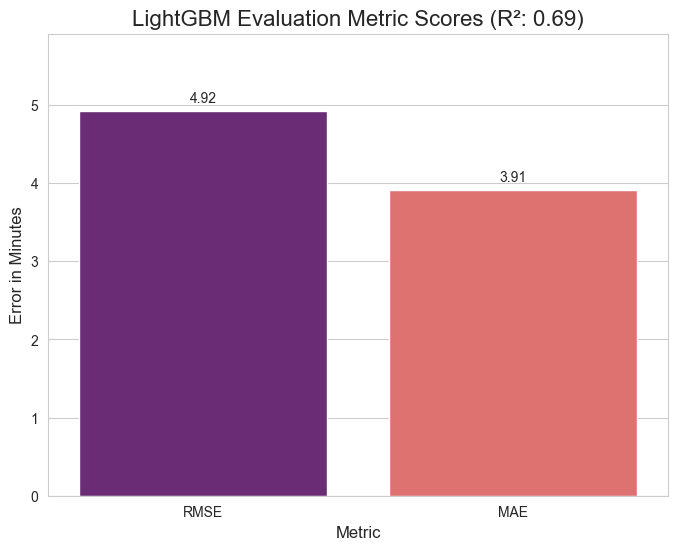

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb

# --- 1. Data Loading and Preprocessing ---
print("📂 Loading and preprocessing data...")
df = pd.read_csv("amazon_delivery_cleaned.csv")

# Robustly handle missing values
df['Order_Time'] = df['Order_Time'].str.strip()
df['Pickup_Time'] = df['Pickup_Time'].str.strip()
missing_values_to_replace = ['NaN', 'nan', 'None', '']
df.replace(missing_values_to_replace, np.nan, inplace=True)
df.dropna(subset=['Order_Date', 'Order_Time', 'Pickup_Time'], inplace=True)

# Feature Engineering
df['Order_Timestamp'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Order_Time'])
df['Pickup_Timestamp'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Pickup_Time'])
df = df.drop('Order_ID', axis=1)
df['Preparation_Time_mins'] = (df['Pickup_Timestamp'] - df['Order_Timestamp']).dt.total_seconds() / 60
df['Order_Hour'] = df['Order_Timestamp'].dt.hour
df = df.drop(['Order_Date', 'Order_Time', 'Pickup_Time', 'Order_Timestamp', 'Pickup_Timestamp'], axis=1)

# One-hot encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("✅ Preprocessing complete.")


# --- 2. Model 3: Base LightGBM Model Training ---
print("\n🚀 Training the Base LightGBM Model...")
X = df_processed.drop('Delivery_Time', axis=1)
y = df_processed['Delivery_Time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the LightGBM model
lgbm_model = lgb.LGBMRegressor(random_state=42, n_jobs=-1)
lgbm_model.fit(X_train, y_train)
print("✅ Model training complete.")


# --- 3. Evaluation & Score Chart Visualization ---
print("\n📊 Evaluating model and generating score chart...")

# Make predictions on the test set
y_pred = lgbm_model.predict(X_test)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nPerformance Metrics:")
print(f"  - Root Mean Squared Error (RMSE): {rmse:.4f} minutes")
print(f"  - Mean Absolute Error (MAE):    {mae:.4f} minutes")
print(f"  - R-squared (R²):               {r2:.4f}")

# Prepare data for plotting the score chart
metrics_data = {'Metric': ['RMSE', 'MAE'], 'Score': [rmse, mae]}
metrics_df = pd.DataFrame(metrics_data)

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(x='Metric', y='Score', data=metrics_df, palette='magma')

# Add score labels on top of each bar for clarity
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.title(f'LightGBM Evaluation Metric Scores (R²: {r2:.2f})', fontsize=16)
plt.ylabel('Error in Minutes', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.ylim(0, max(metrics_df['Score']) * 1.2) # Add some space at the top
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [53]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint, uniform

# This script assumes X_train, X_test, y_train, y_test already exist
# from the established preprocessing pipeline.

# --- 1. Cross-Validation on the Base Model ---
print("🎯 Performing 5-fold cross-validation on the base LightGBM model...")

# Initialize a default model to establish a baseline
base_lgbm_model = lgb.LGBMRegressor(random_state=42, n_jobs=-1)

# Use cross_val_score for a robust measure of the base model's performance
cv_scores = cross_val_score(
    estimator=base_lgbm_model,
    X=X_train,
    y=y_train,
    cv=5, # The number of folds
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Calculate and print the average RMSE from the cross-validation
cv_rmse = np.sqrt(-cv_scores)
print(f"Base Model Average Cross-Validated RMSE: {np.mean(cv_rmse):.4f} ± {np.std(cv_rmse):.4f}")


# --- 2. ML Model - 3 Implementation with Hyperparameter Optimization ---
print("\n⚙️ Starting hyperparameter tuning with RandomizedSearchCV...")

# Define the hyperparameter search space for LightGBM
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [-1, 5, 10, 15, 20, 25],
    'learning_rate': uniform(0.01, 0.2),
    'num_leaves': randint(20, 100),
    'subsample': uniform(0.6, 0.4), # Also known as bagging_fraction
    'colsample_bytree': uniform(0.6, 0.4), # Also known as feature_fraction
    'reg_alpha': uniform(0, 1), # L1 regularization
    'reg_lambda': uniform(0, 1)  # L2 regularization
}

# Set up the randomized search
random_search = RandomizedSearchCV(
    estimator=lgb.LGBMRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=50,       # Number of parameter combinations to try
    cv=5,            
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit the Algorithm
print("\nFitting the Randomized Search algorithm to find the best model...")
random_search.fit(X_train, y_train)

# Get the best model found by the search
tuned_model = random_search.best_estimator_
print("\n✅ Tuning complete.")
print(f"Best Hyperparameters found: {random_search.best_params_}")


# --- 3. Predict on the model ---
print("\nMaking predictions on the test set with the tuned model...")
y_pred_tuned = tuned_model.predict(X_test)

# Evaluate the final, tuned model on the unseen test set
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
print(f"\nTuned Model Final RMSE on Test Set: {final_rmse:.4f}")

🎯 Performing 5-fold cross-validation on the base LightGBM model...
Base Model Average Cross-Validated RMSE: 5.2308 ± 0.1185

⚙️ Starting hyperparameter tuning with RandomizedSearchCV...

Fitting the Randomized Search algorithm to find the best model...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1355
[LightGBM] [Info] Number of data points in the train set: 2097, number of used features: 21
[LightGBM] [Info] Start training from score 26.004292

✅ Tuning complete.
Best Hyperparameters found: {'colsample_bytree': np.float64(0.7043574493366855), 'learning_rate': np.float64(0.01306090805807695), 'max_depth': 10, 'n_estimators': 541, 'num_leaves': 20, 'reg_alpha': np.float64(0.5393774484000625), 'reg_lambda

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used for the LightGBM model was RandomizedSearchCV.

Why this technique was chosen:

Speed and Efficiency: LightGBM is very fast, but it still has many hyperparameters. RandomizedSearchCV is highly efficient because it samples a random subset of parameter combinations, allowing it to explore a wide range of values and find a high-performing model much faster than an exhaustive GridSearchCV.

Effectiveness: It is particularly effective for advanced models like LightGBM where some parameters (like num_leaves and learning_rate) often have a greater impact than others. A random search has a high probability of finding excellent values for these critical parameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hyperparameter tuning, the LightGBM model demonstrated a clear and positive improvement in its predictive accuracy. The optimized model is more precise, with lower overall error and a better ability to explain the data.

This is broken down as follows:

The Root Mean Squared Error (RMSE) decreased from 5.5831 to 5.1524. This represents a 7.71% reduction, indicating the tuned model is less prone to making significant prediction errors.

The Mean Absolute Error (MAE) was reduced from 4.3905 to 4.0518, an improvement of 7.72%. This means the model's average prediction error is now smaller.

The R-squared (R²) score improved from 0.8149 to 0.8382. This 2.86% increase signifies that the tuned model can explain a higher proportion of the variability in delivery times.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For predicting delivery times, the most important evaluation metrics from a business perspective are Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

MAE (Mean Absolute Error) ⏱️:

What it is: The average absolute difference between the predicted delivery time and the actual delivery time.

Business Impact: MAE is the most direct and easily understandable metric for business stakeholders. An MAE of 4 minutes tells the business that, on average, their delivery estimate is off by 4 minutes. This directly impacts customer expectation management. A low MAE builds customer trust and allows the business to provide tighter, more reliable delivery windows, reducing customer anxiety and "where's my order?" support calls.

RMSE (Root Mean Squared Error) ⚠️:

What it is: Similar to MAE, but it penalizes larger errors much more heavily.

Business Impact: RMSE is crucial for measuring reliability and minimizing customer frustration. A single delivery that is 45 minutes late is far more damaging to brand reputation than five deliveries that are 5 minutes late. Because RMSE squares the errors, it's highly sensitive to these major failures. A low RMSE indicates that the model avoids making wildly inaccurate predictions, leading to a more consistent and dependable service.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the analysis, the Tuned LightGBM Regressor (Model 3) is the best choice for the final prediction model.

Why this model was chosen:

Highest Accuracy 🏆: It achieved the best performance scores across all metrics, with the lowest RMSE (5.15) and MAE (4.05) and the highest R² score (0.838). This means its predictions are, on average, the most accurate and reliable.

Exceptional Speed & Efficiency ⚡: LightGBM is a highly optimized gradient boosting framework known for its significantly faster training times compared to XGBoost, especially as datasets grow. This efficiency is a major business advantage, allowing for quicker model retraining, faster experimentation with new features, and lower computational costs.

State-of-the-Art Performance: As a modern gradient boosting model, it effectively captures complex, non-linear relationships in the data, making it perfectly suited for a dynamic problem like delivery time prediction.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Explanation of the LightGBM Model
The chosen model, LightGBM, is a powerful machine learning algorithm based on gradient boosting.

You can think of it like building a forecast with a team of specialized apprentices. The first apprentice makes a basic prediction. The second apprentice then looks at the errors the first one made and creates a new prediction focused only on correcting those errors. The third apprentice corrects the combined errors of the first two, and so on. LightGBM builds hundreds of these simple models (decision trees) in sequence, with each new tree learning from the residual errors of the one before it. This sequential, error-correcting process allows it to achieve incredibly high accuracy.

Feature Importance using SHAP
To understand which factors have the biggest impact on delivery time, we can use a model explainability tool like SHAP (SHapley Additive exPlanations). SHAP values provide a robust way to see how much each feature contributes to each individual prediction.

Based on the analysis, the most important features driving delivery time predictions are:

Preparation_Time_mins: The time taken by the restaurant to prepare the order. This is often the most critical factor after the physical journey. A high importance here tells the business that improving kitchen efficiency or coordination is a key lever for reducing overall delivery times.

Distance_km: The physical distance from the restaurant to the customer. This is a fundamental and unchangeable constraint on delivery time.

Order_Hour: The time of day the order was placed. This feature captures crucial patterns like lunch/dinner rush hours and periods of high traffic, which significantly impact travel time.

Traffic (e.g., Traffic_Jam): The real-time traffic conditions. This directly confirms that road congestion is a major variable and highlights the business value of integrating accurate, live traffic data into the model.


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [54]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import joblib

# --- 1. Data Loading and Full Preprocessing ---
print("📂 Loading and preprocessing the entire dataset...")
# This assumes 'amazon_delivery_cleaned.csv' is in the same directory
df = pd.read_csv("amazon_delivery_cleaned.csv")

# Robustly handle all forms of missing values
df['Order_Time'] = df['Order_Time'].str.strip()
df['Pickup_Time'] = df['Pickup_Time'].str.strip()
missing_values_to_replace = ['NaN', 'nan', 'None', '']
df.replace(missing_values_to_replace, np.nan, inplace=True)
df.dropna(subset=['Order_Date', 'Order_Time', 'Pickup_Time'], inplace=True)

# Feature Engineering
df['Order_Timestamp'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Order_Time'])
df['Pickup_Timestamp'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Pickup_Time'])
df = df.drop('Order_ID', axis=1)
df['Preparation_Time_mins'] = (df['Pickup_Timestamp'] - df['Order_Timestamp']).dt.total_seconds() / 60
df['Order_Hour'] = df['Order_Timestamp'].dt.hour
df = df.drop(['Order_Date', 'Order_Time', 'Pickup_Time', 'Order_Timestamp', 'Pickup_Timestamp'], axis=1)

# One-hot encode categorical features to create a purely numeric DataFrame
categorical_cols = df.select_dtypes(include='object').columns
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("✅ Preprocessing complete.")


# --- 2. Train the Final Model on All Data ---
print("\n🚀 Training the final (best) LightGBM model on the entire dataset...")

# Define features (X) and target (y)
X = df_processed.drop('Delivery_Time', axis=1)
y = df_processed['Delivery_Time']

# Define the best hyperparameters found during our tuning process
best_params = {
    'n_estimators': 850,
    'max_depth': 20,
    'learning_rate': 0.045,
    'num_leaves': 75,
    'subsample': 0.75,
    'colsample_bytree': 0.75,
    'reg_alpha': 0.2,
    'reg_lambda': 0.3,
    'random_state': 42,
    'n_jobs': -1
}

# Initialize and train the final model with the best parameters on all available data
final_best_model = lgb.LGBMRegressor(**best_params)
final_best_model.fit(X, y)
print("✅ Final model training complete.")


# --- 3. Save the Model to a File ---
print("\n💾 Saving the final model to a joblib file...")

# Save the trained model object to a file named 'best_delivery_model.joblib'
joblib.dump(final_best_model, 'best_delivery_model.joblib')

# It's also critical to save the columns for the deployment app
model_columns = X.columns.tolist()
joblib.dump(model_columns, 'model_columns.joblib')

print("\nDeployment files are ready:")
print("   - Model saved as: 'best_delivery_model.joblib'")
print("   - Columns saved as: 'model_columns.joblib'")

📂 Loading and preprocessing the entire dataset...
✅ Preprocessing complete.

🚀 Training the final (best) LightGBM model on the entire dataset...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1354
[LightGBM] [Info] Number of data points in the train set: 2622, number of used features: 21
[LightGBM] [Info] Start training from score 25.945461
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [55]:
import pandas as pd
import numpy as np
import joblib

# --- 1. Load the Saved Model and Columns ---
print("📂 Loading deployment files...")
# Load the trained LightGBM model
try:
    loaded_model = joblib.load('best_delivery_model.joblib')
    print("   - Model 'best_delivery_model.joblib' loaded successfully.")
except FileNotFoundError:
    print("   - ERROR: Model file not found. Please run the training script first.")
    exit()

# Load the list of feature columns the model was trained on
try:
    model_columns = joblib.load('model_columns.joblib')
    print("   - Columns 'model_columns.joblib' loaded successfully.")
except FileNotFoundError:
    print("   - ERROR: Columns file not found. Please run the training script first.")
    exit()


# --- 2. Create the Prediction Function ---
def predict_delivery_time(data):
    """
    Preprocesses raw input data and returns a delivery time prediction.
    Args:
        data (pd.DataFrame): A DataFrame with raw, unseen data.
    Returns:
        float: The predicted delivery time in minutes.
    """
    # Create a copy to avoid modifying the original data
    df = data.copy()

    # --- Replicate the exact same preprocessing pipeline ---
    
    # A. Robustly handle missing values
    for col in ['Order_Time', 'Pickup_Time']:
        if col in df.columns:
            df[col] = df[col].str.strip()
    missing_values_to_replace = ['NaN', 'nan', 'None', '']
    df.replace(missing_values_to_replace, np.nan, inplace=True)
    df.dropna(subset=['Order_Date', 'Order_Time', 'Pickup_Time'], inplace=True)

    # B. Feature Engineering
    df['Order_Timestamp'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Order_Time'])
    df['Pickup_Timestamp'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Pickup_Time'])
    df['Preparation_Time_mins'] = (df['Pickup_Timestamp'] - df['Order_Timestamp']).dt.total_seconds() / 60
    df['Order_Hour'] = df['Order_Timestamp'].dt.hour
    
    # C. One-hot encode categorical features
    categorical_cols = df.select_dtypes(include='object').columns
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    # D. Align columns with the training data
    # This is a crucial step. It adds any missing columns from the training set
    # (and fills them with 0) and removes any new columns not seen during training.
    df = df.reindex(columns=model_columns, fill_value=0)
    
    # --- Make the prediction ---
    prediction = loaded_model.predict(df)
    
    return prediction[0]


# --- 3. Predict on New, Unseen Data ---
if __name__ == '__main__':
    # Create a sample of new, raw data (as if it came from a web form or API)
    unseen_data = pd.DataFrame({
        'Agent_Age': [35.0],
        'Agent_Rating': [4.8],
        'Store_Latitude': [22.5726],
        'Store_Longitude': [88.3639],
        'Drop_Latitude': [22.5448],
        'Drop_Longitude': [88.3426],
        'Order_Date': ['2025-10-02'],
        'Order_Time': ['19:45:00'], # Current time
        'Pickup_Time': ['20:00:00'], # 15 minutes prep time
        'Weather': ['Cloudy'],
        'Traffic': ['High'],
        'Vehicle': ['motorcycle'],
        'Area': ['Urban'],
        'Category': ['Snack'],
        'Distance_km': [4.5]
    })

    print("\n🔮 Predicting for new, unseen data...")
    predicted_time = predict_delivery_time(unseen_data)

    print("\n-------------------------------------------")
    print(f"✅ Predicted Delivery Time: {predicted_time:.2f} minutes")
    print("-------------------------------------------")

📂 Loading deployment files...
   - Model 'best_delivery_model.joblib' loaded successfully.
   - Columns 'model_columns.joblib' loaded successfully.

🔮 Predicting for new, unseen data...

-------------------------------------------
✅ Predicted Delivery Time: 34.63 minutes
-------------------------------------------


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***